In [207]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your dataset
data = pd.read_csv('somalia_food_prices.csv')
data




date           Region  District    market  latitude  longitude  \
0       1/15/1995          Banadir   Banadir   Bakaara  2.048031   45.32000   
1       2/15/1995          Banadir   Banadir   Bakaara  2.048031   45.32000   
2       3/15/1995          Banadir   Banadir   Bakaara  2.048031   45.32000   
3       4/15/1995          Banadir   Banadir   Bakaara  2.048031   45.32000   
4       5/15/1995          Banadir   Banadir   Bakaara  2.048031   45.32000   
...           ...              ...       ...       ...       ...        ...   
25035  10/15/2023  Woqooyi Galbeed  Hargeysa  Hargeysa  9.559750   44.06678   
25036  10/15/2023  Woqooyi Galbeed  Hargeysa  Hargeysa  9.559750   44.06678   
25037  10/15/2023  Woqooyi Galbeed  Hargeysa  Hargeysa  9.559750   44.06678   
25038  10/15/2023  Woqooyi Galbeed  Hargeysa  Hargeysa  9.559750   44.06678   
25039  10/15/2023  Woqooyi Galbeed  Hargeysa  Hargeysa  9.559750   44.06678   

                    category                  commodity     unit  priceflag  \
0         cereals and tubers              Sorghum (red)       KG     actual   
1         cereals and tubers              Sorghum (red)       KG     actual   
2         cereals and tubers              Sorghum (red)       KG     actual   
3         cereals and tubers              Sorghum (red)       KG     actual   
4         cereals and tubers              Sorghum (red)       KG     actual   
...                      ...                        ...      ...        ...   
25035               non-food              Exchange rate  USD/LCU  aggregate   
25036               non-food              Fuel (diesel)        L  aggregate   
25037           oil and fats  Oil (vegetable, imported)        L  aggregate   
25038        pulses and nuts                    Cowpeas       KG  aggregate   
25039  vegetables and fruits                     Onions       KG  aggregate   

      pricetype currency     price  
0        Retail      SOS    700.00  
1        Retail      SOS    525.00  
2        Retail      SOS    600.00  
3        Retail      SOS    900.00  
4        Retail      SOS   1025.00  
...         ...      ...       ...  
25035    Retail      SLS   8674.14  
25036    Retail      SLS   7586.21  
25037    Retail      SLS  16000.00  
25038    Retail      SLS  17000.00  
25039    Retail      SLS  14793.10  

[25040 rows x 13 columns]

In [181]:
data.head()

date   Region District   market  latitude  longitude  \
0  1/15/1995  Banadir  Banadir  Bakaara  2.048031      45.32   
1  2/15/1995  Banadir  Banadir  Bakaara  2.048031      45.32   
2  3/15/1995  Banadir  Banadir  Bakaara  2.048031      45.32   
3  4/15/1995  Banadir  Banadir  Bakaara  2.048031      45.32   
4  5/15/1995  Banadir  Banadir  Bakaara  2.048031      45.32   

             category      commodity unit priceflag pricetype currency   price  
0  cereals and tubers  Sorghum (red)   KG    actual    Retail      SOS   700.0  
1  cereals and tubers  Sorghum (red)   KG    actual    Retail      SOS   525.0  
2  cereals and tubers  Sorghum (red)   KG    actual    Retail      SOS   600.0  
3  cereals and tubers  Sorghum (red)   KG    actual    Retail      SOS   900.0  
4  cereals and tubers  Sorghum (red)   KG    actual    Retail      SOS  1025.0

In [208]:
data.describe()

latitude     longitude         price
count  25040.000000  25040.000000  2.504000e+04
mean       6.227193     45.645950  1.008389e+05
std        3.367169      2.187421  8.601840e+05
min       -0.360290     40.998291  4.848000e+01
25%        3.117180     43.890121  6.500000e+03
50%        6.772749     45.320000  1.550000e+04
75%        9.527490     47.424278  2.600000e+04
max       11.260000     49.817730  1.725000e+07

In [209]:
data.duplicated().sum()

0

In [210]:
data.isnull().sum()

date         0
Region       0
District     0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
dtype: int64

In [211]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1 

dataCleaned = data[(data['price'] > Q1 - 1.5*IQR) & (data['price'] < Q3 + 1.5*IQR)]

In [212]:
dataCleaned['date'] = pd.to_datetime(dataCleaned['date'])
dataCleaned['price'] = dataCleaned['price'].astype('float')

C:\Users\PC\AppData\Local\Temp\ipykernel_13136\3084767067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['date'] = pd.to_datetime(dataCleaned['date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_13136\3084767067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCleaned['price'] = dataCleaned['price'].astype('float')


In [187]:
data=dataCleaned.set_index('date').sort_index()

In [188]:
data.describe()

latitude     longitude         price
count  23394.000000  23394.000000  23394.000000
mean       6.206789     45.575595  16490.549163
std        3.408943      2.169849  12151.760090
min       -0.360290     40.998291     48.480000
25%        3.117180     43.890121   6000.000000
50%        6.772749     45.320000  14250.000000
75%        9.559750     47.424278  24000.000000
max       11.260000     49.817730  55225.810000

In [189]:
# Assuming your DataFrame is named 'data'
data['Location'] = data['Region'].apply(lambda x: 'Urban' if x == 'Banadir' else 'Rural')

# Verify the changes
print(data.head())


             Region District   market  latitude  longitude  \
date                                                         
1995-01-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-02-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-03-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-04-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-05-15  Banadir  Banadir  Bakaara  2.048031      45.32   

                      category      commodity unit priceflag pricetype  \
date                                                                     
1995-01-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-02-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-03-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-04-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-05-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   

           currency   price Location  
date   

In [190]:
# Assuming your DataFrame is named 'data'
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots to visualize the distribution of prices in urban and rural areas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='price', data=data)
plt.title('Distribution of Food Prices in Urban and Rural Areas')
plt.show()

In [191]:
# Compare Median/IQR
urban_data = data[data['Location'] == 'Urban']
rural_data = data[data['Location'] == 'Rural']

urban_median = urban_data['price'].median()
rural_median = rural_data['price'].median()

In [192]:
urban_iqr = urban_data['price'].quantile(0.75) - urban_data['price'].quantile(0.25)
rural_iqr = rural_data['price'].quantile(0.75) - rural_data['price'].quantile(0.25)

print(f"Median Price - Urban: {urban_median}, Rural: {rural_median}")
print(f"IQR - Urban: {urban_iqr}, Rural: {rural_iqr}")

Median Price - Urban: 13916.67, Rural: 14406.21
IQR - Urban: 10826.665, Rural: 18024.75


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for urban and rural areas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['Location'] == 'Urban'], x='price', bins=30, kde=True, color='blue')
plt.title('Distribution of Prices in Urban Areas')

plt.subplot(1, 2, 2)
sns.histplot(data=data[data['Location'] == 'Rural'], x='price', bins=30, kde=True, color='green')
plt.title('Distribution of Prices in Rural Areas')

plt.show()


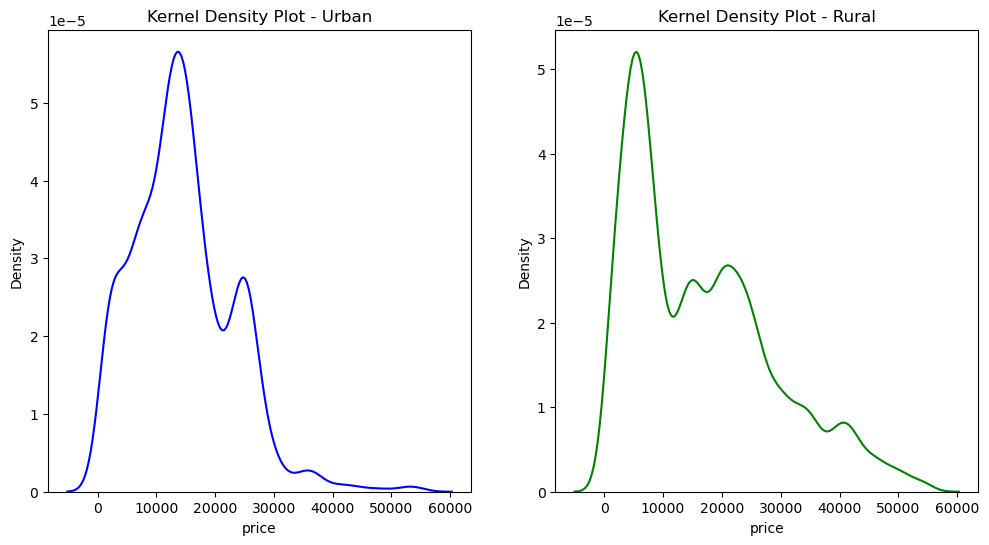

In [194]:
# Kernel density plots for urban and rural areas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=data[data['Location'] == 'Urban']['price'], color='blue')
plt.title('Kernel Density Plot - Urban')

plt.subplot(1, 2, 2)
sns.kdeplot(data=data[data['Location'] == 'Rural']['price'], color='green')
plt.title('Kernel Density Plot - Rural')

plt.show()


In [195]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(urban_data['price'], rural_data['price'])
print(f"Mann-Whitney U Test p-value: {p_value}")


Mann-Whitney U Test p-value: 0.004929941525322622


In [196]:
# Filter data for the specific commodity "Sorghum (red)"
sorghum_data = data[data['commodity'] == 'Sorghum (red)']

# Boxplot for "Sorghum (red)" prices in different locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='price', data=sorghum_data)
plt.title('Distribution of Sorghum (red) Prices by Location')
plt.show()


In [197]:

# Print the first few rows
print(data.head())

             Region District   market  latitude  longitude  \
date                                                         
1995-01-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-02-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-03-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-04-15  Banadir  Banadir  Bakaara  2.048031      45.32   
1995-05-15  Banadir  Banadir  Bakaara  2.048031      45.32   

                      category      commodity unit priceflag pricetype  \
date                                                                     
1995-01-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-02-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-03-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-04-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   
1995-05-15  cereals and tubers  Sorghum (red)   KG    actual    Retail   

           currency   price Location  
date   

In [214]:
data.reset_index(inplace=True)

In [204]:
data['date']

0       1995-01-15
1       1995-02-15
2       1995-03-15
3       1995-04-15
4       1995-05-15
           ...    
23389   2023-10-15
23390   2023-10-15
23391   2023-10-15
23392   2023-10-15
23393   2023-10-15
Name: date, Length: 23394, dtype: datetime64[ns]

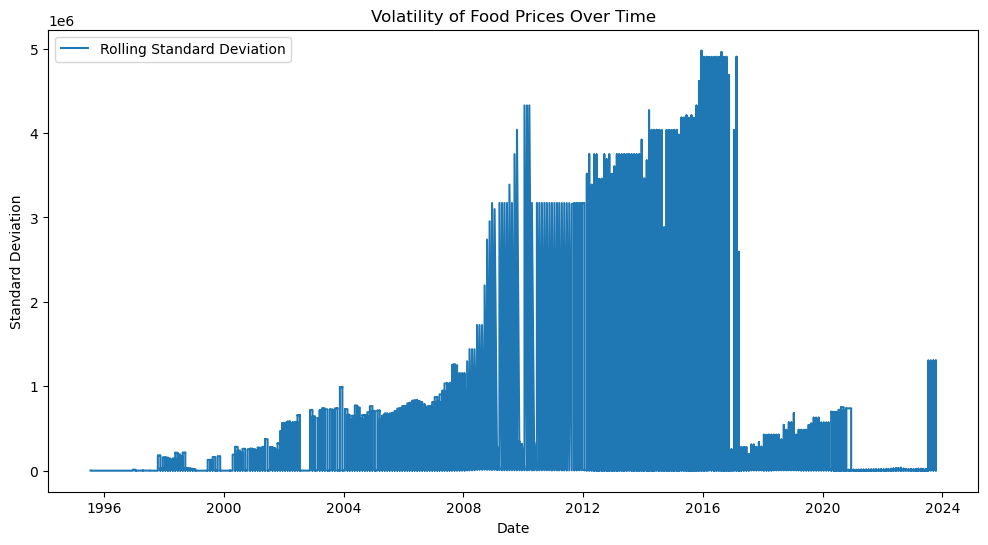

In [218]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'date' is the datetime column
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Calculate rolling standard deviation (adjust window size as needed)
rolling_std = data['price'].rolling(window=12).std()

# Plot rolling standard deviation over time
plt.figure(figsize=(12, 6))
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Volatility of Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


In [220]:
data.reset_index(inplace=True)

In [179]:
# Assuming your data spans multiple years
start_date = '1995-01-01'
end_date = '2005-12-31'

# Calculate standard deviation for the first time period
std_period1 = data.loc[start_date:end_date, 'price'].std()

# Assuming the second time period is from 2006 onwards
std_period2 = data.loc[end_date:, 'price'].std()

print(f"Standard Deviation - Period 1: {std_period1}")
print(f"Standard Deviation - Period 2: {std_period2}")


Standard Deviation - Period 1: 10482.510141958492
Standard Deviation - Period 2: 13145.712887161471


In [54]:
from scipy.stats import mannwhitneyu

# Assuming 'data' is your DataFrame
# Split data into two periods
period1_data = data.loc[data.index < '2006-01-01', 'price']
period2_data = data.loc[data.index >= '2006-01-01', 'price']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(period1_data, period2_data)
print(f"Mann-Whitney U Test p-value: {p_value}")


Mann-Whitney U Test p-value: 0.0


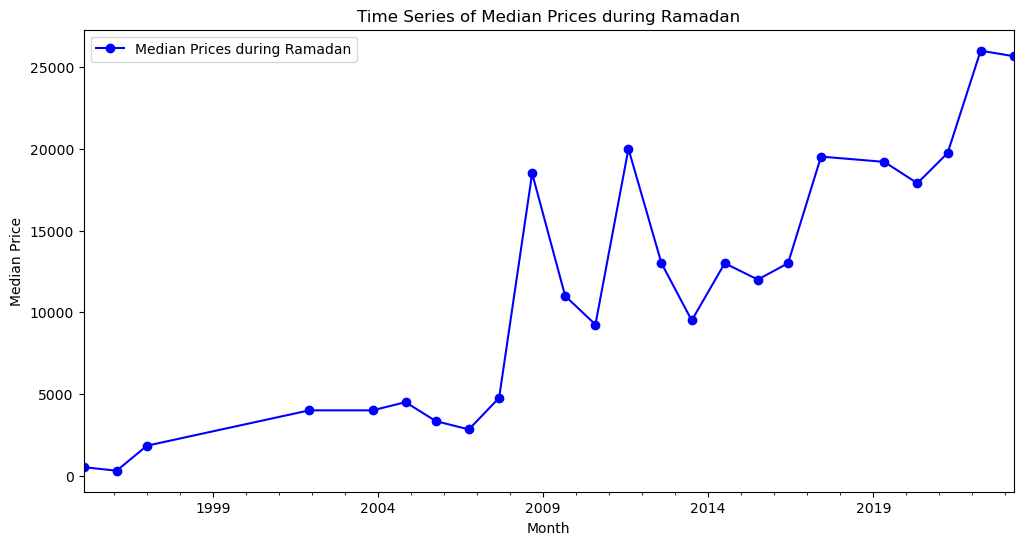

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Define the start and end dates of Ramadan for each year
ramadan_start_end_dates = {
    1995: ('1995-01-31', '1995-02-28'),
    1996: ('1996-01-20', '1996-02-18'),
    1997: ('1997-01-09', '1997-02-07'),
    1998: ('1998-12-29', '1998-01-27'),
    1999: ('1999-12-18', '1999-01-16'),
    2000: ('2000-12-07', '2000-01-05'),
    2001: ('2001-11-26', '2001-12-24'),
    2002: ('2002-11-16', '2002-12-14'),
    2003: ('2003-11-06', '2003-12-05'),
    2004: ('2004-10-25', '2004-11-23'),
    2005: ('2005-10-15', '2005-11-13'),
    2006: ('2006-10-04', '2006-11-02'),
    2007: ('2007-09-13', '2007-10-12'),
    2008: ('2008-09-01', '2008-09-30'),
    2009: ('2009-08-21', '2009-09-19'),
    2010: ('2010-08-11', '2010-09-09'),
    2011: ('2011-08-01', '2011-08-29'),
    2012: ('2012-07-20', '2012-08-18'),
    2013: ('2013-07-09', '2013-08-07'),
    2014: ('2014-06-29', '2014-07-28'),
    2015: ('2015-06-18', '2015-07-17'),
    2016: ('2016-06-06', '2016-07-05'),
    2017: ('2017-05-26', '2017-06-24'),
    2018: ('2018-05-16', '2018-06-14'),
    2019: ('2019-05-06', '2019-06-04'),
    2020: ('2020-04-24', '2020-05-23'),
    2021: ('2021-04-13', '2021-05-12'),
    2022: ('2022-04-02', '2022-05-01'),
    2023: ('2023-03-22', '2023-04-20'),
}

# Initialize an empty list to store DataFrames
ramadan_data_list = []

# Filter data for Ramadan months and append to the list
for year, (start_date, end_date) in ramadan_start_end_dates.items():
    ramadan_data_list.append(data[(data['date'] >= start_date) & (data['date'] <= end_date)])

# Concatenate the list of DataFrames
ramadan_data = pd.concat(ramadan_data_list)

# Calculate median monthly prices for Ramadan
median_prices_ramadan = ramadan_data.groupby(ramadan_data['date'].dt.to_period("M"))['price'].median()

# Plot time series of median prices for Ramadan
plt.figure(figsize=(12, 6))
median_prices_ramadan.plot(marker='o', linestyle='-', color='blue', label='Median Prices during Ramadan')
plt.title('Time Series of Median Prices during Ramadan')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.legend()
plt.show()


In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Define the start dates of Ramadan for each year
ramadan_start_dates = {
    2008: ('2008-09-01', '2008-09-30'),
    2009: ('2009-08-21', '2009-09-19'),
    2010: ('2010-08-11', '2010-09-09'),
    2011: ('2011-08-01', '2011-08-29'),
    2012: ('2012-07-20', '2012-08-18'),
    2013: ('2013-07-09', '2013-08-07'),
    2014: ('2014-06-29', '2014-07-28'),
    2015: ('2015-06-18', '2015-07-17'),
    2016: ('2016-06-06', '2016-07-05'),
    2017: ('2017-05-26', '2017-06-24'),
    2018: ('2018-05-16', '2018-06-14'),
    2019: ('2019-05-06', '2019-06-04'),
    2020: ('2020-04-24', '2020-05-23'),
    2021: ('2021-04-13', '2021-05-12'),
    2022: ('2022-04-02', '2022-05-01'),
    2023: ('2023-03-22', '2023-04-20'),
}

# Initialize an empty list to store DataFrames
ramadan_data_list = []

# Filter data for Ramadan months and append to the list
for year, start_date in ramadan_start_dates.items():
    end_date = pd.to_datetime(start_date[1]) + pd.DateOffset(days=29)
    ramadan_data_list.append(data[(data['date'] >= pd.to_datetime(start_date[0])) & (data['date'] <= end_date)])

# Concatenate the list of DataFrames
ramadan_data = pd.concat(ramadan_data_list)

# Calculate median monthly prices for Ramadan
median_prices_ramadan = ramadan_data.groupby(ramadan_data['date'].dt.to_period("M"))['price'].median()

# Plot time series of median prices for Ramadan
plt.figure(figsize=(12, 6))
median_prices_ramadan.plot(marker='o', linestyle='-', color='blue', label='Median Prices during Ramadan')
plt.title('Time Series of Median Prices during Ramadan (2008-2023)')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.legend()
plt.show()


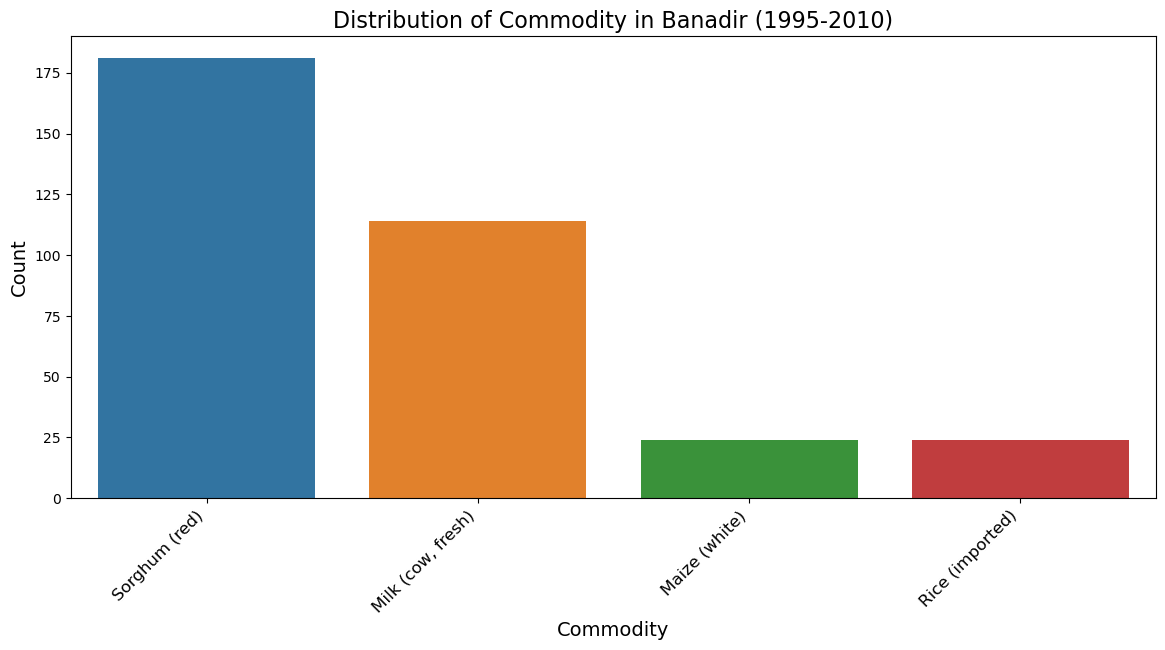

In [259]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(1995, 2010))]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir' from 1995 to 2000
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_1995_to_2000_data)
plt.title('Distribution of Commodity in Banadir (1995-2010)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


In [261]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2010, 2024))]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir' from 1995 to 2000
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_1995_to_2000_data)
plt.title('Distribution of Commodity in Banadir (2010-2015)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_13136\4023120896.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13136\4023120896.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)


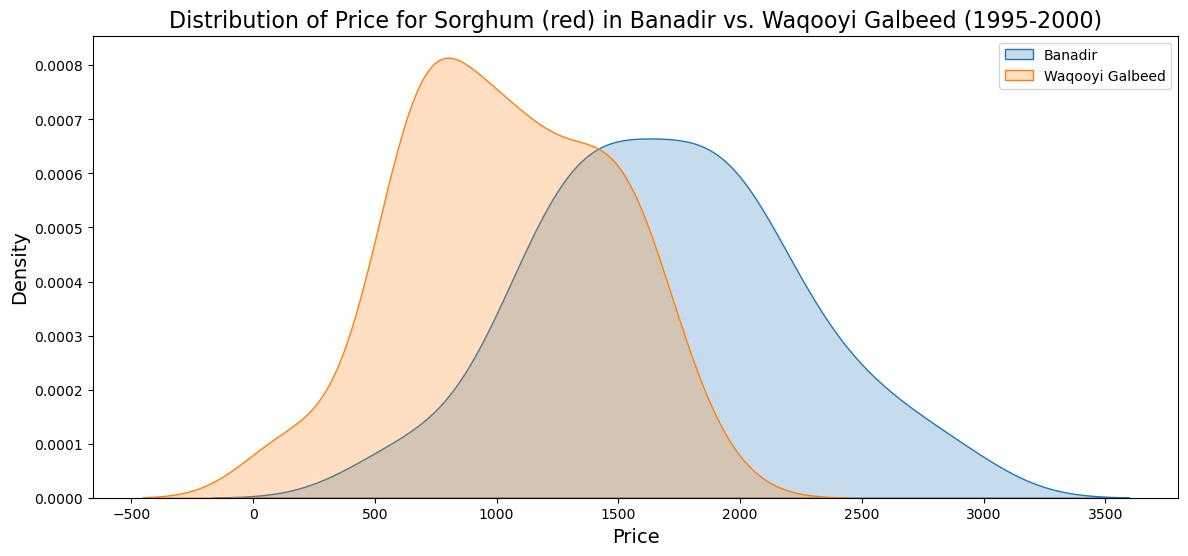

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 1995
end_year = 2000

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2000
end_year = 2010

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_13136\3863260983.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13136\3863260983.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_13136\2854669271.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_13136\2854669271.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)


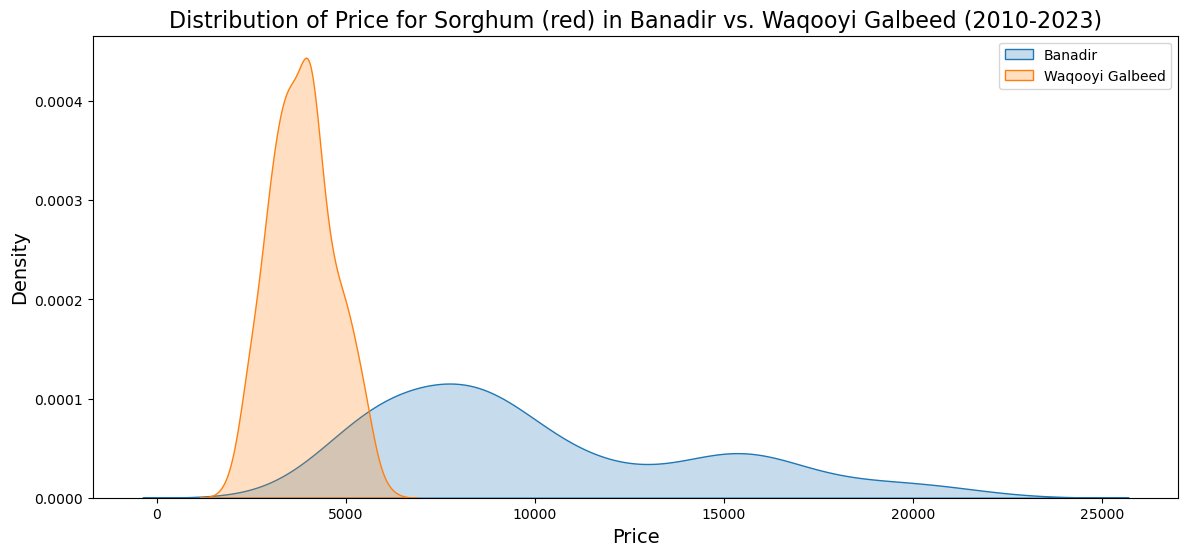

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2010
end_year = 2023

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2823547024.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


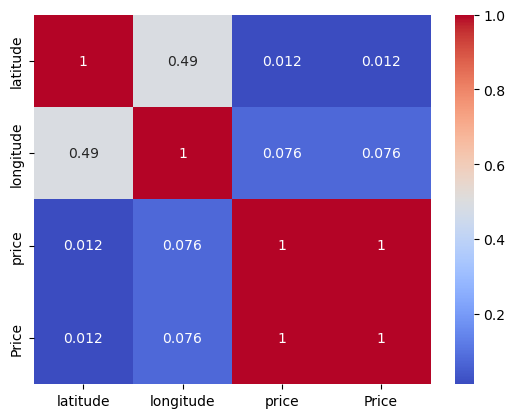

In [41]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Region' distribution in the entire dataset
sns.countplot(x='Region', data=data)
plt.title('Distribution of Regions in the Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Region', fontsize=14)

plt.show()


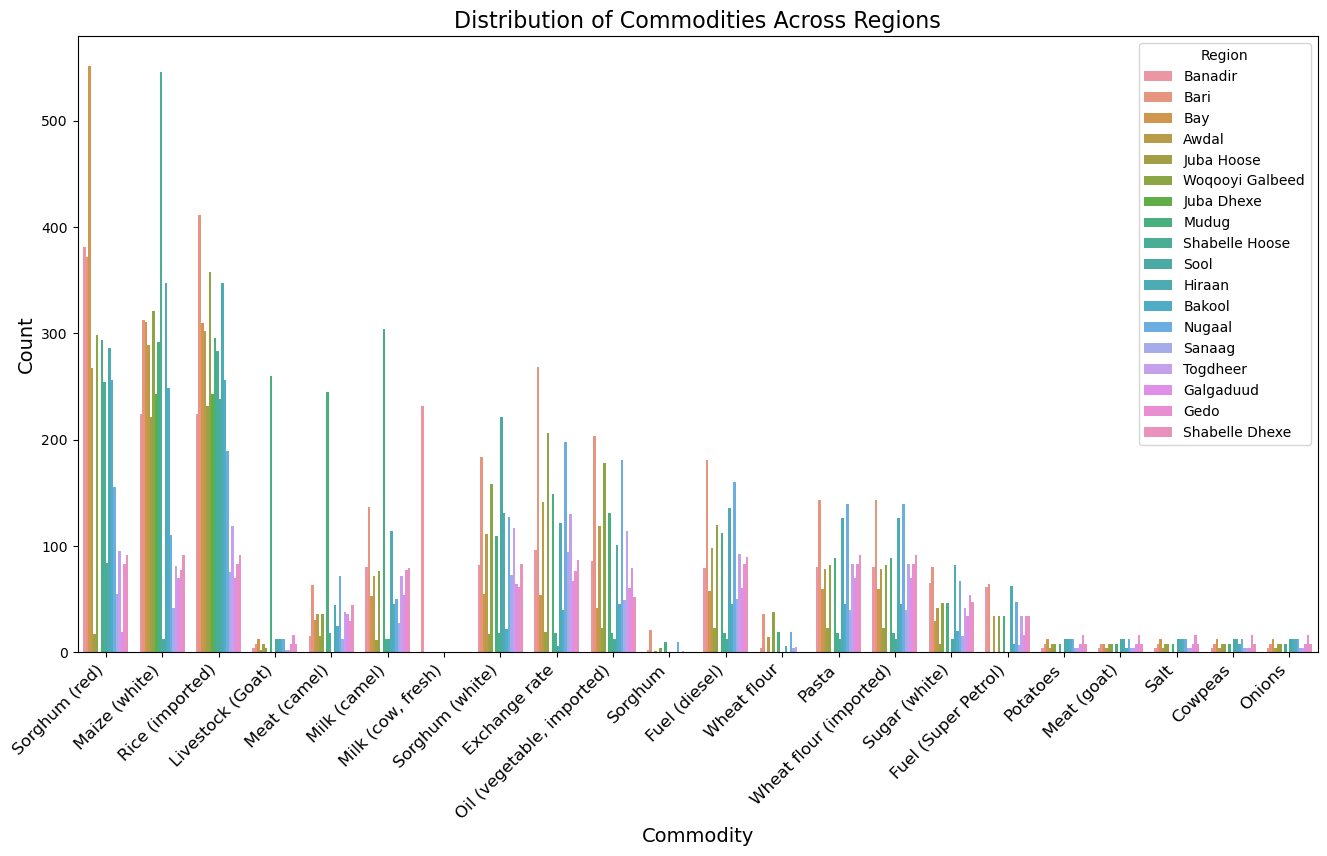

In [251]:
# Set a larger figure size for better visibility
plt.figure(figsize=(16, 8))

# Countplot for 'Commodity' across all regions
sns.countplot(x='commodity', data=data, hue='Region')
plt.title('Distribution of Commodities Across Regions', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)
plt.legend(title='Region')

plt.show()


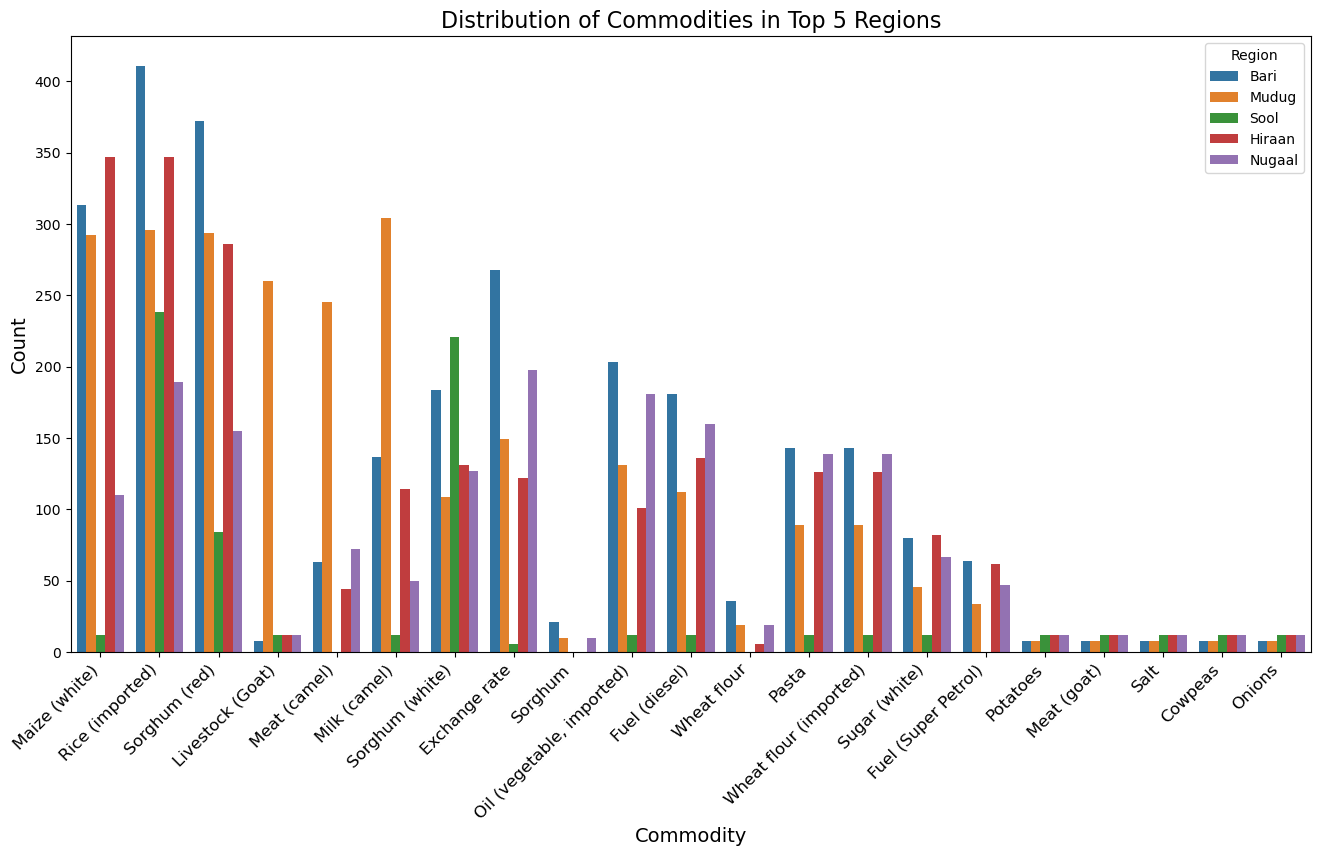

In [252]:
# Calculate total sales by region
total_sales_by_region = data.groupby('Region')['price'].sum().sort_values(ascending=False)

# Select the top 5 regions
top_regions = total_sales_by_region.head(5).index

# Subset the data for the top 5 regions
top_regions_data = data[data['Region'].isin(top_regions)]

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 8))

# Countplot for 'Commodity' in the top 5 regions
sns.countplot(x='commodity', data=top_regions_data, hue='Region')
plt.title('Distribution of Commodities in Top 5 Regions', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)
plt.legend(title='Region')

plt.show()


In [253]:
# Specify the regions of interest
selected_regions = ['Banadir', 'Woqooyi Galbeed', 'Mudug', 'Hiraan', 'Bari']

# Subset the data for the selected regions
selected_regions_data = data[data['Region'].isin(selected_regions)]

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 8))

# Countplot for 'Commodity' in the selected regions
sns.countplot(x='commodity', data=selected_regions_data, hue='Region')
plt.title('Distribution of Commodities in Selected Regions', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)
plt.legend(title='Region')

plt.show()


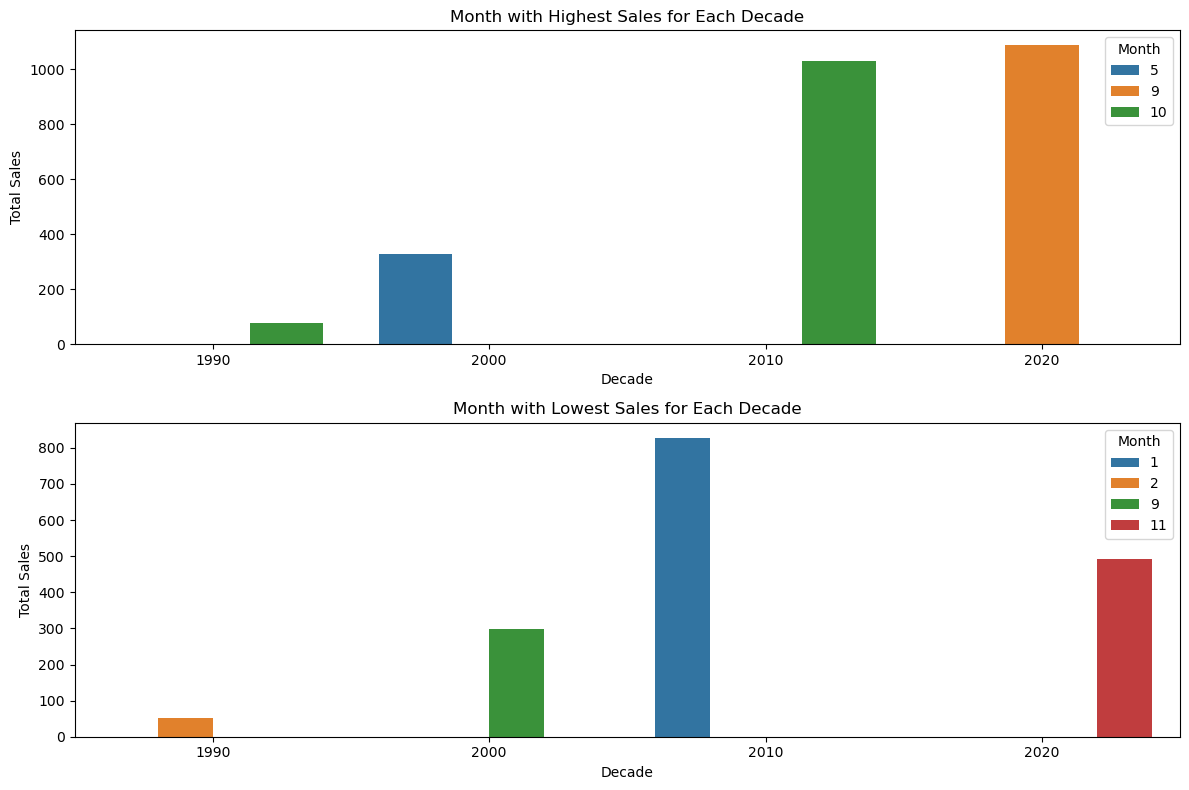

In [54]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract decade and month from the 'date' column
data['decade'] = data['date'].dt.year // 10 * 10
data['month'] = data['date'].dt.month

# Group by decade and month, calculate total sales
sales_by_decade_month = data.groupby(['decade', 'month']).size().reset_index(name='total_sales')

# Find the month with the highest and lowest sales for each decade
max_sales_month = sales_by_decade_month.loc[sales_by_decade_month.groupby('decade')['total_sales'].idxmax()]
min_sales_month = sales_by_decade_month.loc[sales_by_decade_month.groupby('decade')['total_sales'].idxmin()]

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot the month with the highest sales for each decade
plt.subplot(2, 1, 1)
sns.barplot(x='decade', y='total_sales', hue='month', data=max_sales_month)
plt.title('Month with Highest Sales for Each Decade')
plt.xlabel('Decade')
plt.ylabel('Total Sales')
plt.legend(title='Month')

# Plot the month with the lowest sales for each decade
plt.subplot(2, 1, 2)
sns.barplot(x='decade', y='total_sales', hue='month', data=min_sales_month)
plt.title('Month with Lowest Sales for Each Decade')
plt.xlabel('Decade')
plt.ylabel('Total Sales')
plt.legend(title='Month')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


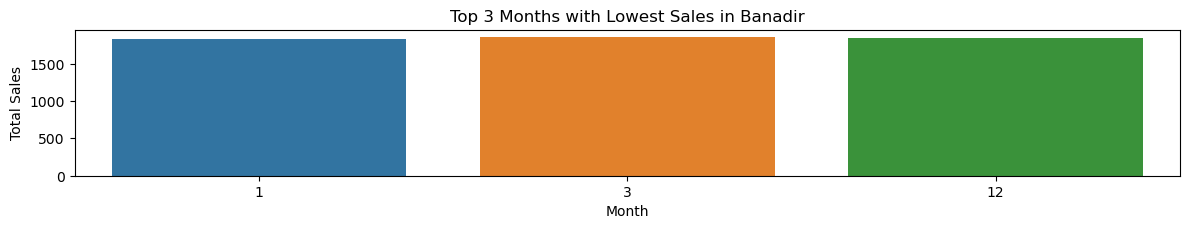

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset and converted 'date' to datetime
# Assuming you've added the 'month' column as mentioned in the previous code snippet

# Subset of the data for 'Banadir' region
banadir_data = data

# Group by month in Banadir, calculate total sales
banadir_sales_by_month = banadir_data.groupby('month').size().reset_index(name='total_sales')

# Find the top 3 months with the highest and lowest sales in Banadir
top3_highest_banadir = banadir_sales_by_month.nlargest(3, 'total_sales')
top3_lowest_banadir = banadir_sales_by_month.nsmallest(3, 'total_sales')

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 16))

# Bar plot for the top 3 months with the highest sales in Banadir
plt.subplot(2, 1, 1)
sns.barplot(x='month', y='total_sales', data=banadir_sales_by_month[banadir_sales_by_month['month'].isin(top3_highest_banadir['month'])])
plt.title('Top 3 Months with Highest Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Smaller and wider bar plot for the top 3 months with the lowest sales in Banadir
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 2)
sns.barplot(x='month', y='total_sales', data=banadir_sales_by_month[banadir_sales_by_month['month'].isin(top3_lowest_banadir['month'])])
plt.title('Top 3 Months with Lowest Sales in Banadir')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\3973867223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\3973867223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['date'].dt.month


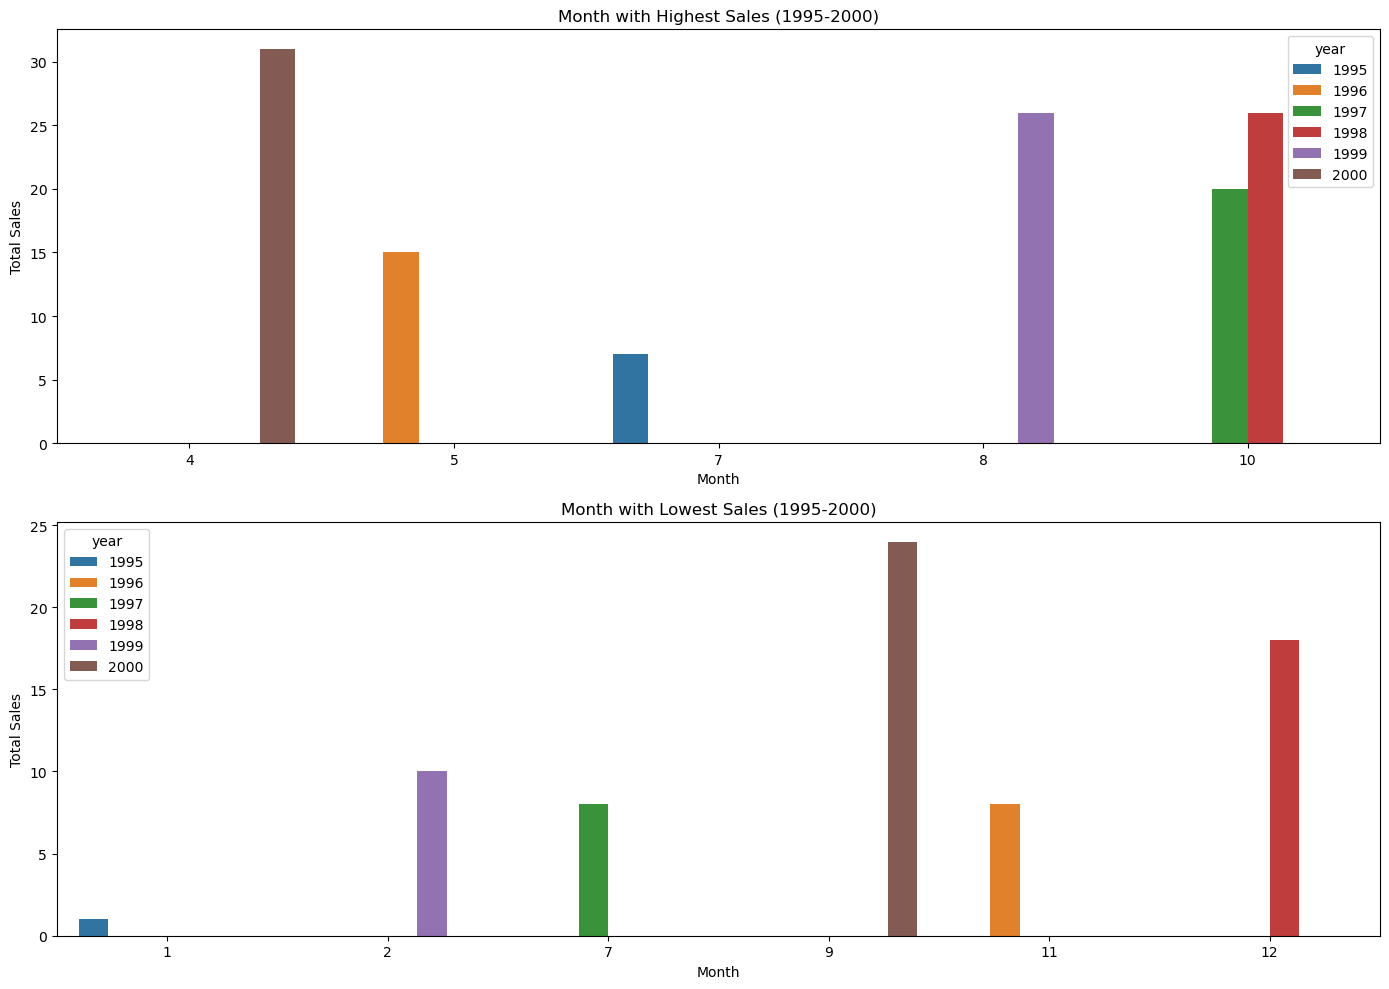

In [58]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Filter data for the years 1995 to 2000
filtered_data = data[(data['date'].dt.year >= 1995) & (data['date'].dt.year <= 2000)]

# Extract year and month from the 'date' column
filtered_data['year'] = filtered_data['date'].dt.year
filtered_data['month'] = filtered_data['date'].dt.month

# Group by year and month, calculate total sales
sales_by_year_month = filtered_data.groupby(['year', 'month']).size().reset_index(name='total_sales')

# Find the month with the highest and lowest sales for each year
max_sales_month_year = sales_by_year_month.loc[sales_by_year_month.groupby('year')['total_sales'].idxmax()]
min_sales_month_year = sales_by_year_month.loc[sales_by_year_month.groupby('year')['total_sales'].idxmin()]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 10))

# Bar plot for the month with the highest sales for each year
plt.subplot(2, 1, 1)
sns.barplot(x='month', y='total_sales', hue='year', data=max_sales_month_year)
plt.title('Month with Highest Sales (1995-2000)')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Bar plot for the month with the lowest sales for each year
plt.subplot(2, 1, 2)
sns.barplot(x='month', y='total_sales', hue='year', data=min_sales_month_year)
plt.title('Month with Lowest Sales (1995-2000)')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


In [61]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Filter data for the years 1995 to 2000
filtered_data = data[(data['date'].dt.year >= 1995) & (data['date'].dt.year <= 2000)]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 10))

for year in range(1995, 2001):
    # Subset data for the current year
    year_data = filtered_data[filtered_data['date'].dt.year == year]

    # Calculate total sales for each month
    sales_by_month = year_data.groupby(year_data['date'].dt.month)['price'].sum()

    # Find the month with the highest and lowest sales
    max_sales_month = sales_by_month.idxmax()
    min_sales_month = sales_by_month.idxmin()

    # Bar plot for the month with the highest sales
    plt.subplot(6, 2, (year - 1995) * 2 + 1)
    sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
    plt.title(f'Month with Highest Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')

    # Highlight the month with the highest sales
    plt.axvline(x=max_sales_month, color='red', linestyle='--', label='Max Sales Month')
    plt.legend()

    # Bar plot for the month with the lowest sales
    plt.subplot(6, 2, (year - 1995) * 2 + 2)
    sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
    plt.title(f'Month with Lowest Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')

    # Highlight the month with the lowest sales
    plt.axvline(x=min_sales_month, color='blue', linestyle='--', label='Min Sales Month')
    plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


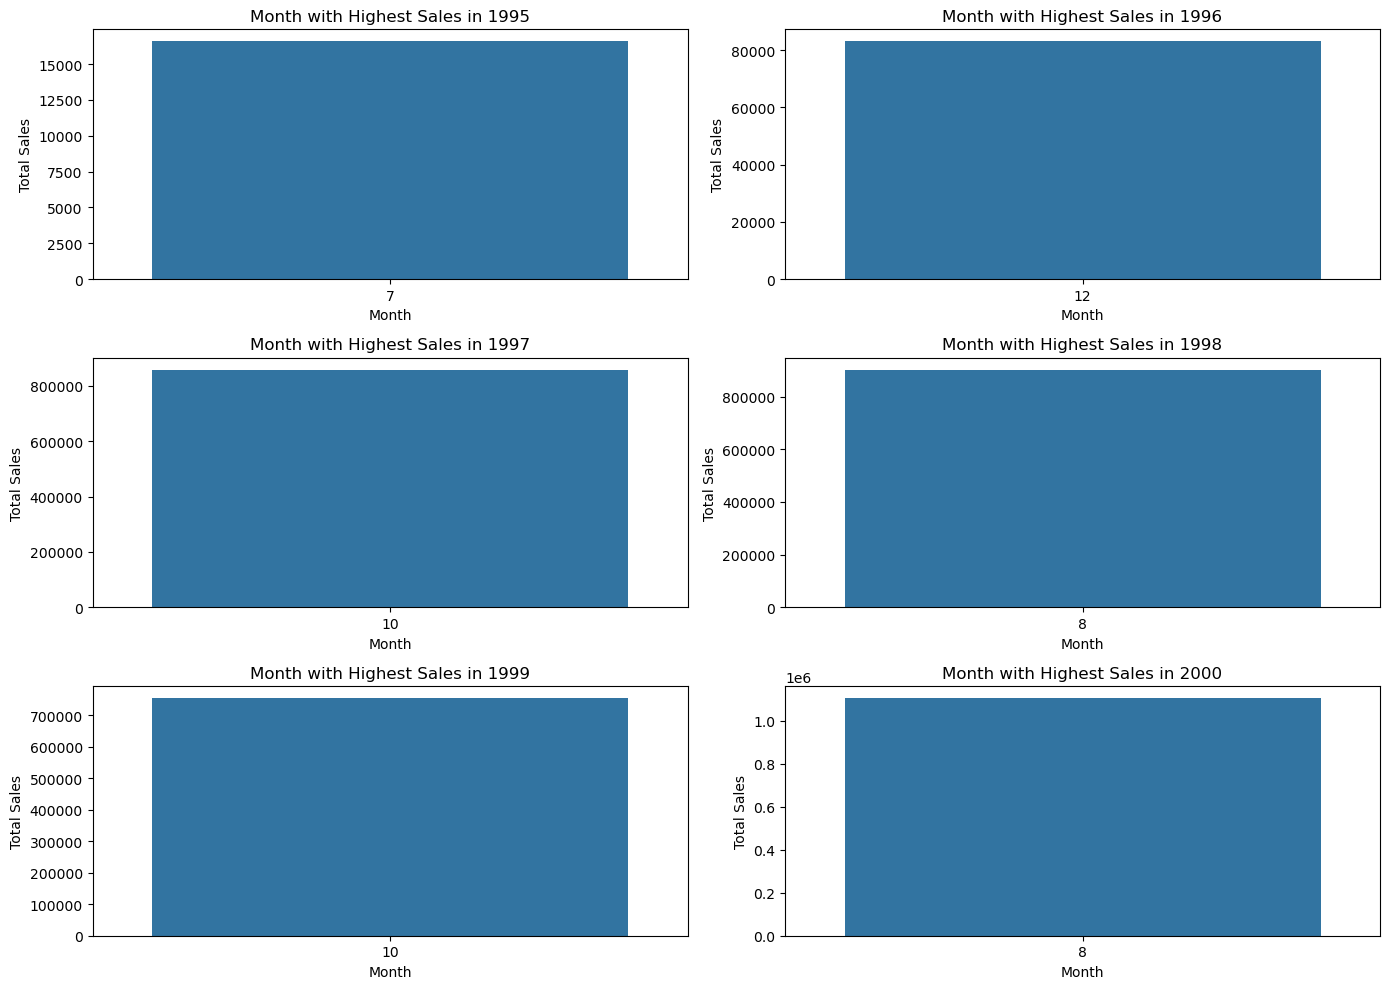

In [64]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Filter data for the years 1995 to 2000
filtered_data = data[(data['date'].dt.year >= 1995) & (data['date'].dt.year <= 2000)]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 10))

for i, year in enumerate(range(1995, 2001), start=1):
    # Subset data for the current year
    year_data = filtered_data[filtered_data['date'].dt.year == year]

    # Calculate total sales for each month
    sales_by_month = year_data.groupby(year_data['date'].dt.month)['price'].sum()

    # Find the month with the highest and lowest sales
    max_sales_month = sales_by_month.idxmax()
    min_sales_month = sales_by_month.idxmin()

    # Bar plot for the month with the highest sales
    plt.subplot(3, 2, i)
    sns.barplot(x=[max_sales_month], y=[sales_by_month[max_sales_month]])
    plt.title(f'Month with Highest Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


In [254]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Group by year and month, calculate total sales
sales_by_year_month = data.groupby(['date']).sum()['price']

# Find the month with the highest sales
max_sales_month = sales_by_year_month.idxmax()

# Subset data for the month with the highest sales
max_sales_data = data[data['date'].dt.month == max_sales_month.month]

# Get the row with the maximum sales
max_sales_row = max_sales_data.loc[max_sales_data['price'].idxmax()]

# Display information about the month with the highest sales
print(f"Month with Highest Sales: {max_sales_month.strftime('%B %Y')}")
print("Details:")
print(f"Region: {max_sales_row['Region']}")
print(f"District: {max_sales_row['District']}")
print(f"Market: {max_sales_row['market']}")
print(f"Category: {max_sales_row['category']}")
print(f"Commodity: {max_sales_row['commodity']}")
print(f"Total Sales: {max_sales_row['price']} {max_sales_row['currency']}")


Month with Highest Sales: October 2023
Details:
Region: Mudug
District: Gaalkacyo
Market: Gaalkacyo
Category: meat, fish and eggs
Commodity: Meat (camel)
Total Sales: 17000000.0 SOS


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2138475479.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_year_month = data.groupby(['date']).sum()['price']


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of the data for 'Banadir' region
banadir_data = data[data['Region'] == 'Banadir']

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 18))

# Time series plot for 'Price' in 'Banadir'
plt.subplot(4, 1, 1)
plt.plot(banadir_data['date'], banadir_data['price'])
plt.title('Time Series Plot of Price in Banadir', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Bar plot for 'District' in 'Banadir'
plt.subplot(4, 2, 3)
sns.countplot(x='District', data=banadir_data)
plt.title('Distribution of District in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('District', fontsize=14)

# Bar plot for 'Market' in 'Banadir'
plt.subplot(4, 2, 4)
sns.countplot(x='market', data=banadir_data)
plt.title('Distribution of Market in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Market', fontsize=14)

# Bar plot for 'Category' in 'Banadir'
plt.subplot(4, 2, 5)
sns.countplot(x='category', data=banadir_data)
plt.title('Distribution of Category in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Category', fontsize=14)

# Bar plot for 'Commodity' in 'Banadir'
plt.subplot(4, 2, 6)
sns.countplot(x='commodity', data=banadir_data)
plt.title('Distribution of Commodity in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

# Bar plot for 'Unit' in 'Banadir'
plt.subplot(4, 2, 7)
sns.countplot(x='unit', data=banadir_data)
plt.title('Distribution of Unit in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Unit', fontsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


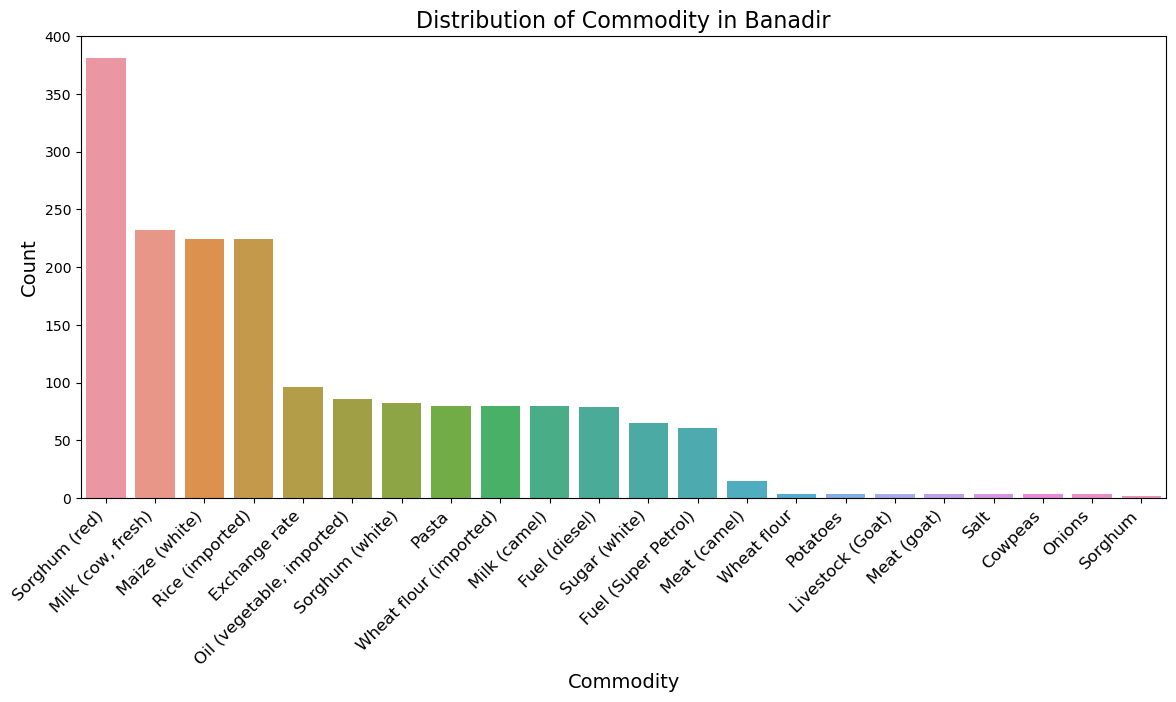

In [84]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region
banadir_data = data[data['Region'] == 'Banadir']

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir'
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_data, order=banadir_data['commodity'].value_counts().index)
plt.title('Distribution of Commodity in Banadir', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


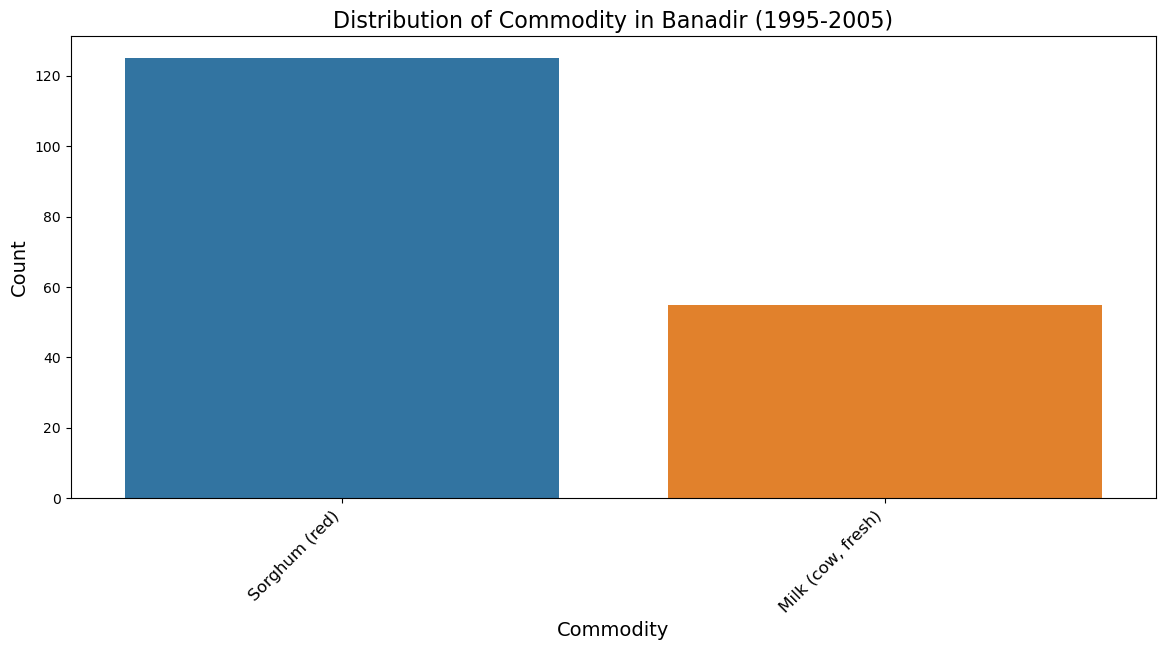

In [96]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(1995, 2005))]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir' from 1995 to 2000
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_1995_to_2000_data)
plt.title('Distribution of Commodity in Banadir (1995-2005)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


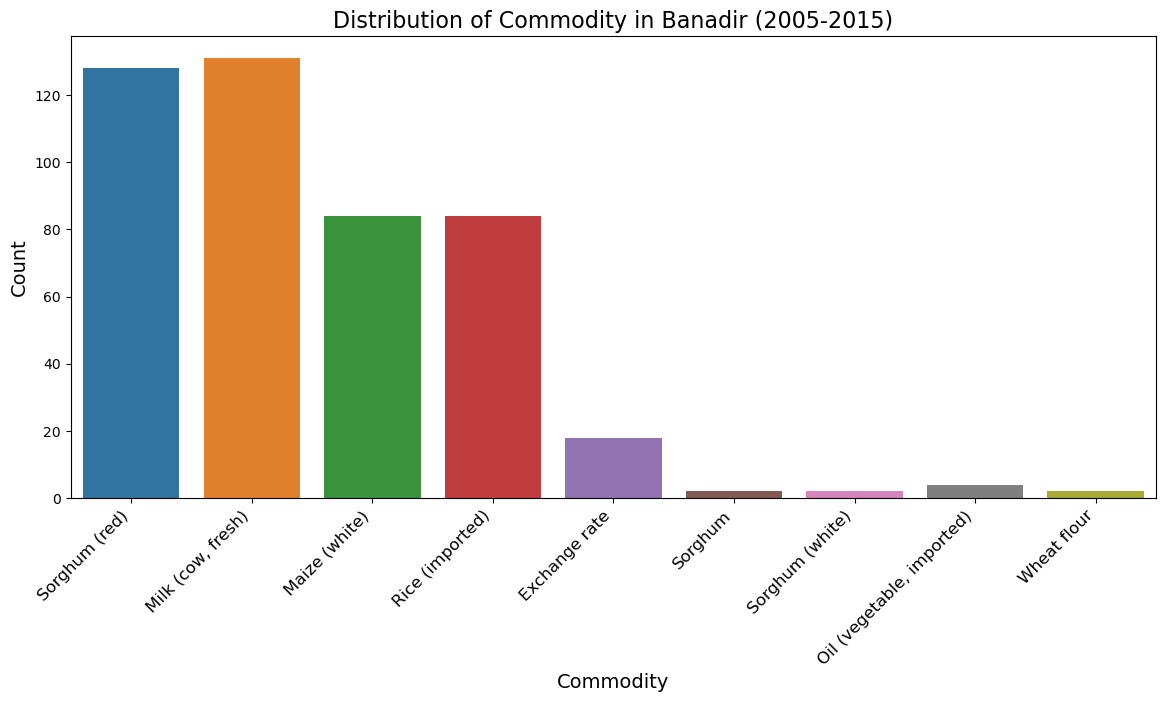

In [124]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2005, 2015))]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir' from 1995 to 2000
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_1995_to_2000_data)
plt.title('Distribution of Commodity in Banadir (2005-2015)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


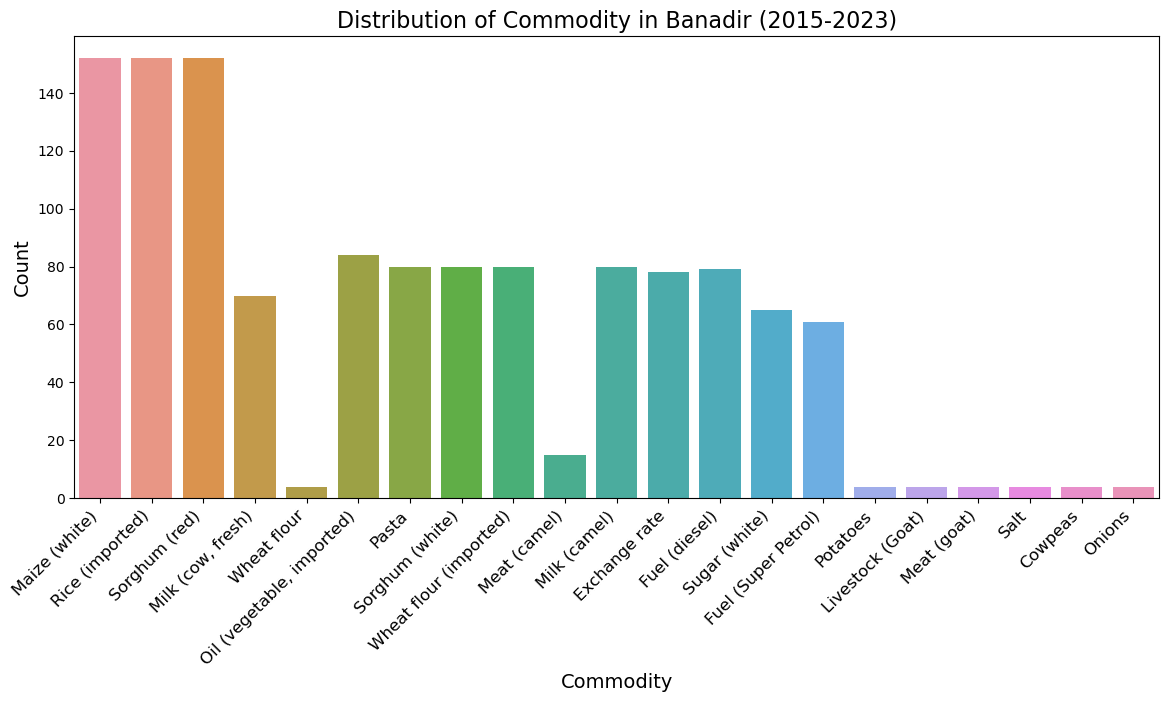

In [98]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2015, 2023))]

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 6))

# Bar plot for 'Commodity' in 'Banadir' from 1995 to 2000
plt.subplot(1, 1, 1)
sns.countplot(x='commodity', data=banadir_1995_to_2000_data)
plt.title('Distribution of Commodity in Banadir (2015-2023)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Commodity', fontsize=14)

plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\

<Figure size 1600x1200 with 0 Axes>

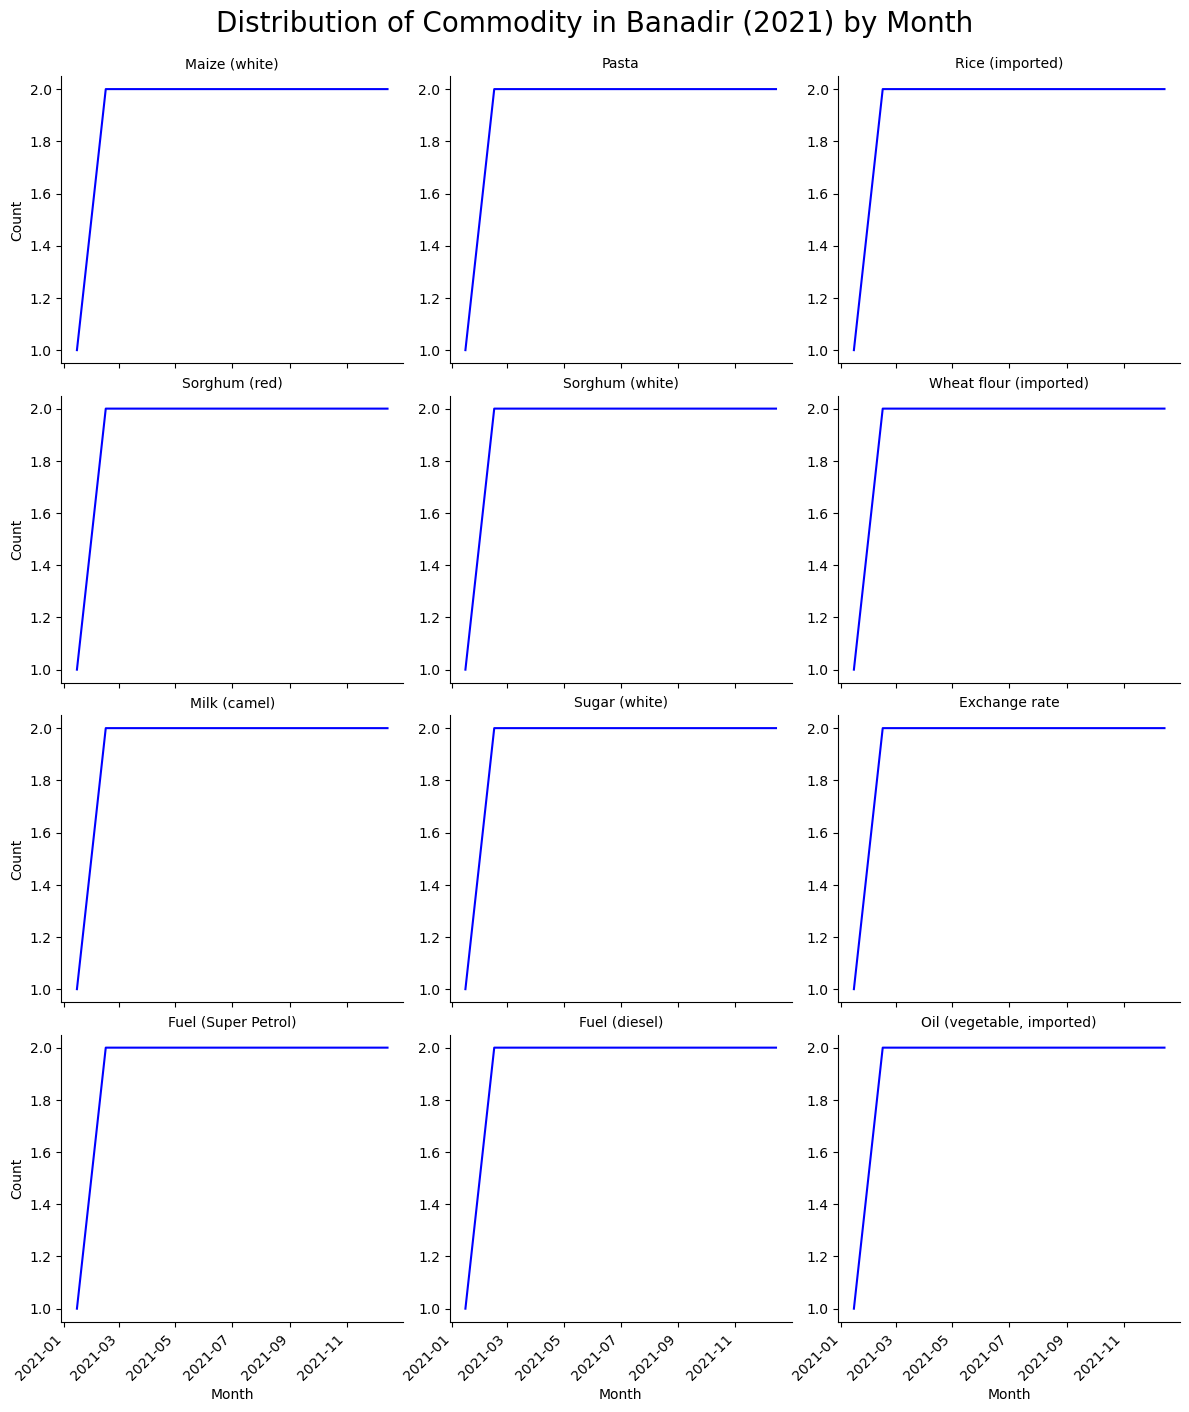

In [121]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2021, 2021))]

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 12))

# Create a FacetGrid to create separate line plots for each commodity
g = sns.FacetGrid(banadir_1995_to_2000_data, col='commodity', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'date', 'price', ci=None, estimator='count', color='blue')
g.set_axis_labels('Month', 'Count')
g.set_titles(col_template="{col_name}", fontsize=16)
g.fig.suptitle('Distribution of Commodity in Banadir (2021) by Month', y=1.02, fontsize=20)
g.fig.autofmt_xdate(rotation=45)

# Add month labels to each chart
for ax in g.axes.flat:
    ax.annotate(ax.get_title(), xy=(0.5, 0), xytext=(0, -20), ha='center', va='top', fontsize=12)

plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\

<Figure size 1600x1200 with 0 Axes>

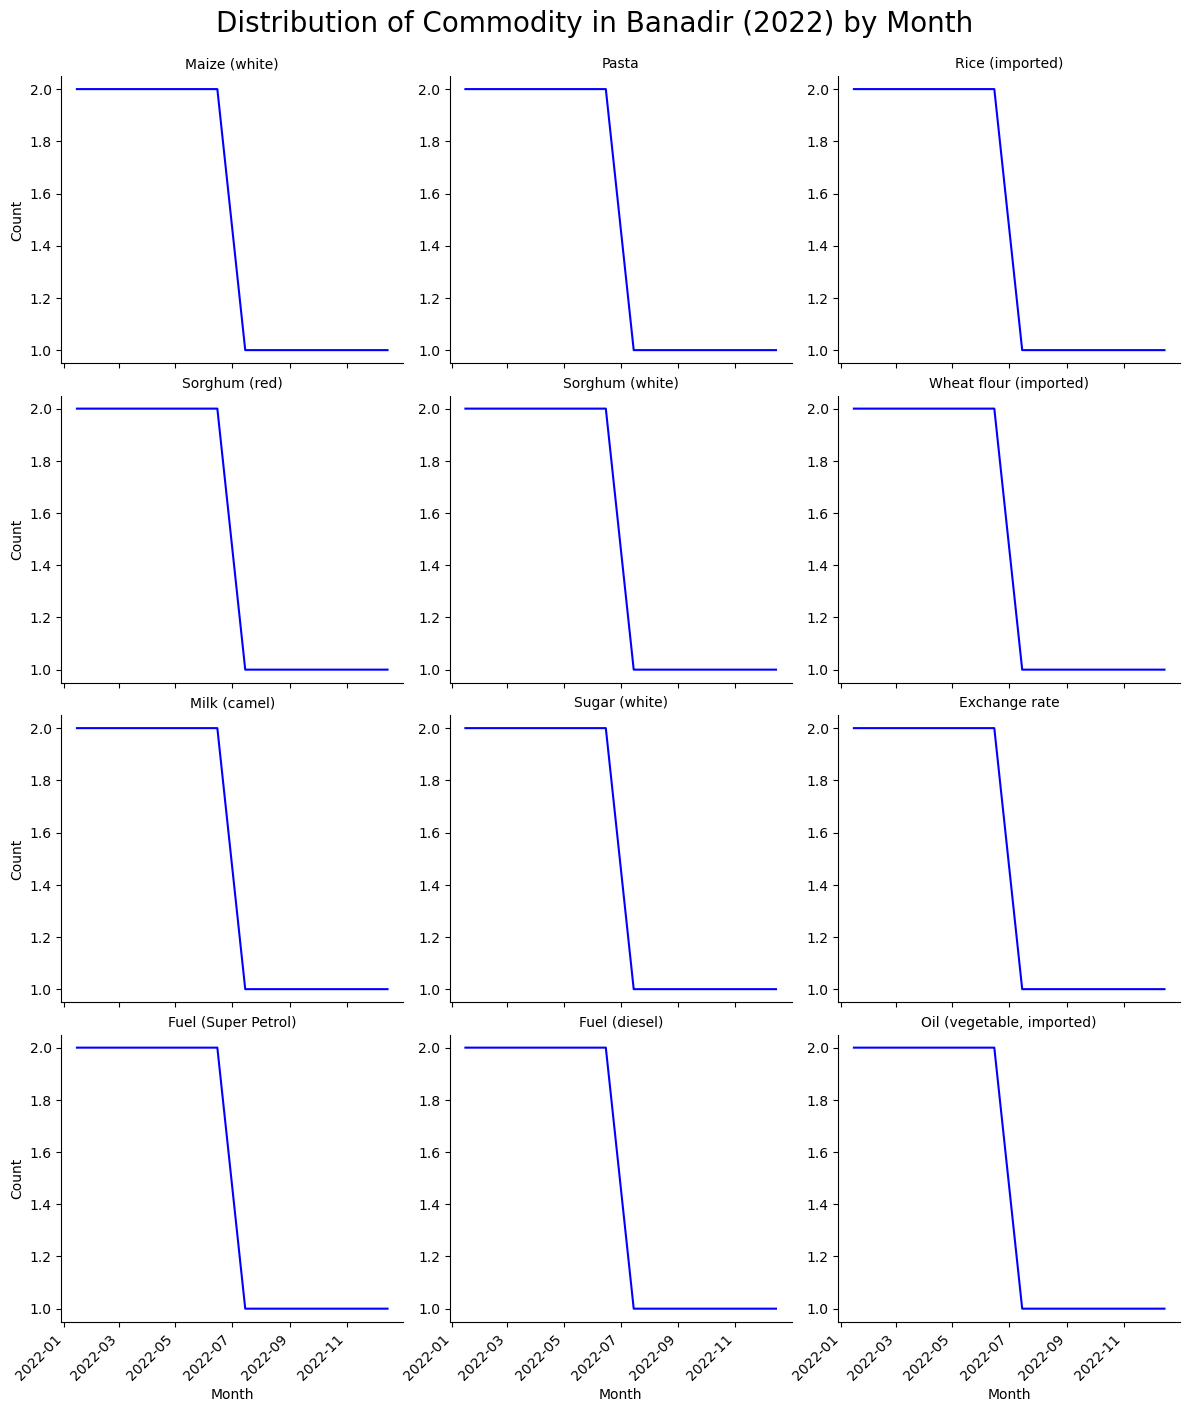

In [131]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2022, 2022))]

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 12))

# Create a FacetGrid to create separate line plots for each commodity
g = sns.FacetGrid(banadir_1995_to_2000_data, col='commodity', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'date', 'price', ci=None, estimator='count', color='blue')
g.set_axis_labels('Month', 'Count')
g.set_titles(col_template="{col_name}", fontsize=16)
g.fig.suptitle('Distribution of Commodity in Banadir (2022) by Month', y=1.02, fontsize=20)
g.fig.autofmt_xdate(rotation=45)

# Add month labels to each chart
for ax in g.axes.flat:
    ax.annotate(ax.get_title(), xy=(0.5, 0), xytext=(0, -20), ha='center', va='top', fontsize=12)

plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\

<Figure size 1600x1200 with 0 Axes>

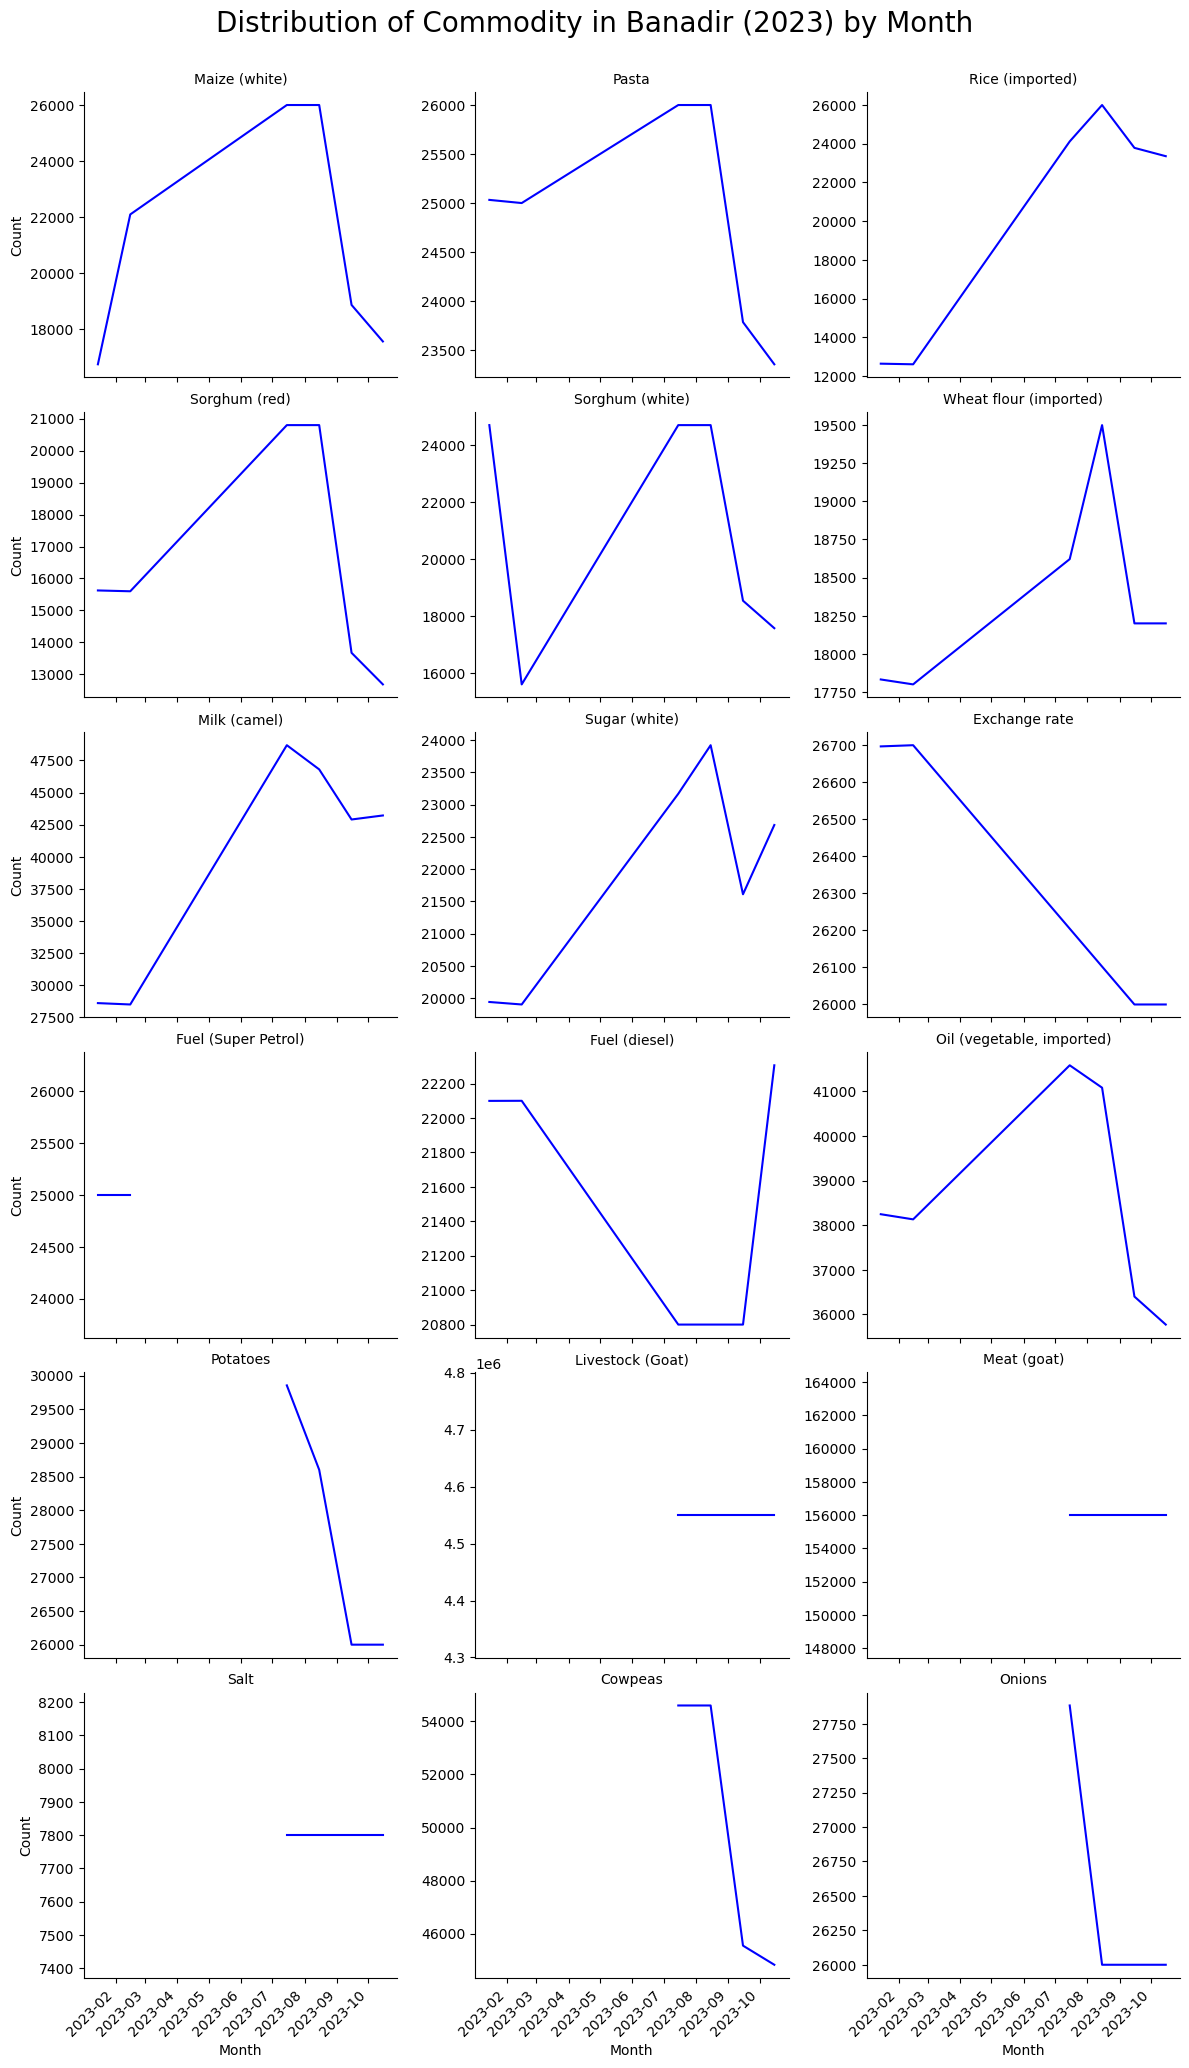

In [133]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Subset of the data for 'Banadir' region and the years 1995 to 2000
banadir_1995_to_2000_data = data[(data['Region'] == 'Banadir') & (data['date'].dt.year.between(2023, 2023))]

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 12))

# Create a FacetGrid to create separate line plots for each commodity
g = sns.FacetGrid(banadir_1995_to_2000_data, col='commodity', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'date', 'price', ci=None, estimator='count', color='blue')
g.set_axis_labels('Month', 'Count')
g.set_titles(col_template="{col_name}", fontsize=16)
g.fig.suptitle('Distribution of Commodity in Banadir (2023) by Month', y=1.02, fontsize=20)
g.fig.autofmt_xdate(rotation=45)

# Add month labels to each chart
for ax in g.axes.flat:
    ax.annotate(ax.get_title(), xy=(0.5, 0), xytext=(0, -20), ha='center', va='top', fontsize=12)

plt.show()


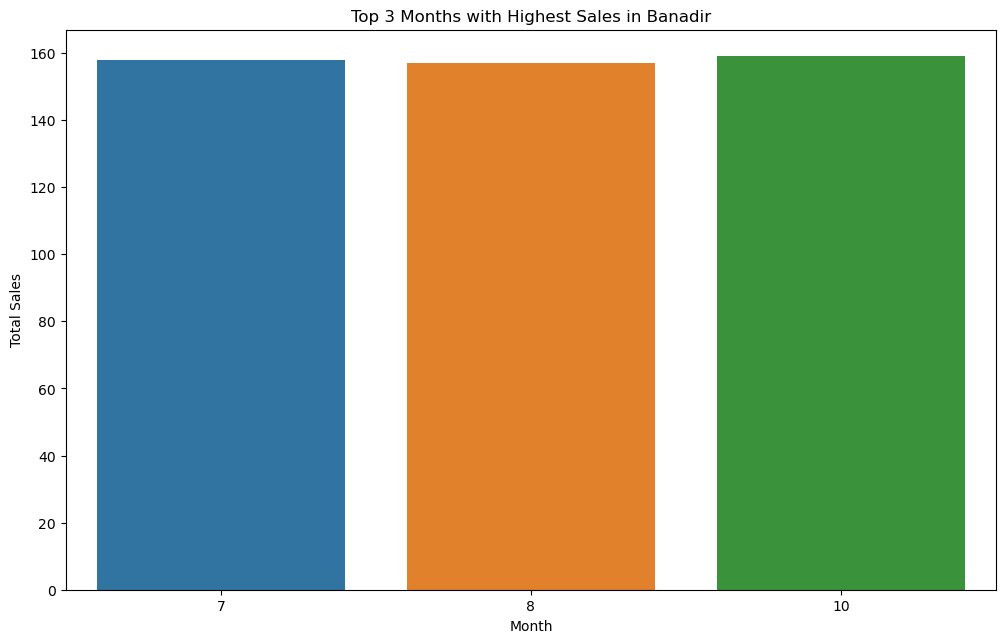

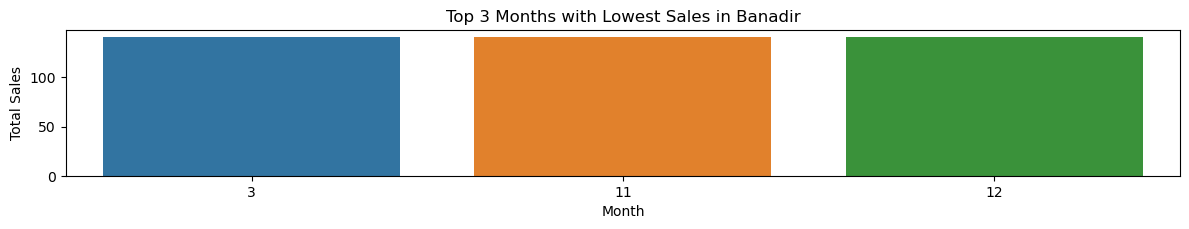

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset and converted 'date' to datetime
# Assuming you've added the 'month' column as mentioned in the previous code snippet

# Subset of the data for 'Banadir' region
banadir_data = data[data['Region'] == 'Banadir']

# Group by month in Banadir, calculate total sales
banadir_sales_by_month = banadir_data.groupby('month').size().reset_index(name='total_sales')

# Find the top 3 months with the highest and lowest sales in Banadir
top3_highest_banadir = banadir_sales_by_month.nlargest(3, 'total_sales')
top3_lowest_banadir = banadir_sales_by_month.nsmallest(3, 'total_sales')

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 16))

# Bar plot for the top 3 months with the highest sales in Banadir
plt.subplot(2, 1, 1)
sns.barplot(x='month', y='total_sales', data=banadir_sales_by_month[banadir_sales_by_month['month'].isin(top3_highest_banadir['month'])])
plt.title('Top 3 Months with Highest Sales in Banadir')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Smaller and wider bar plot for the top 3 months with the lowest sales in Banadir
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 2)
sns.barplot(x='month', y='total_sales', data=banadir_sales_by_month[banadir_sales_by_month['month'].isin(top3_lowest_banadir['month'])])
plt.title('Top 3 Months with Lowest Sales in Banadir')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


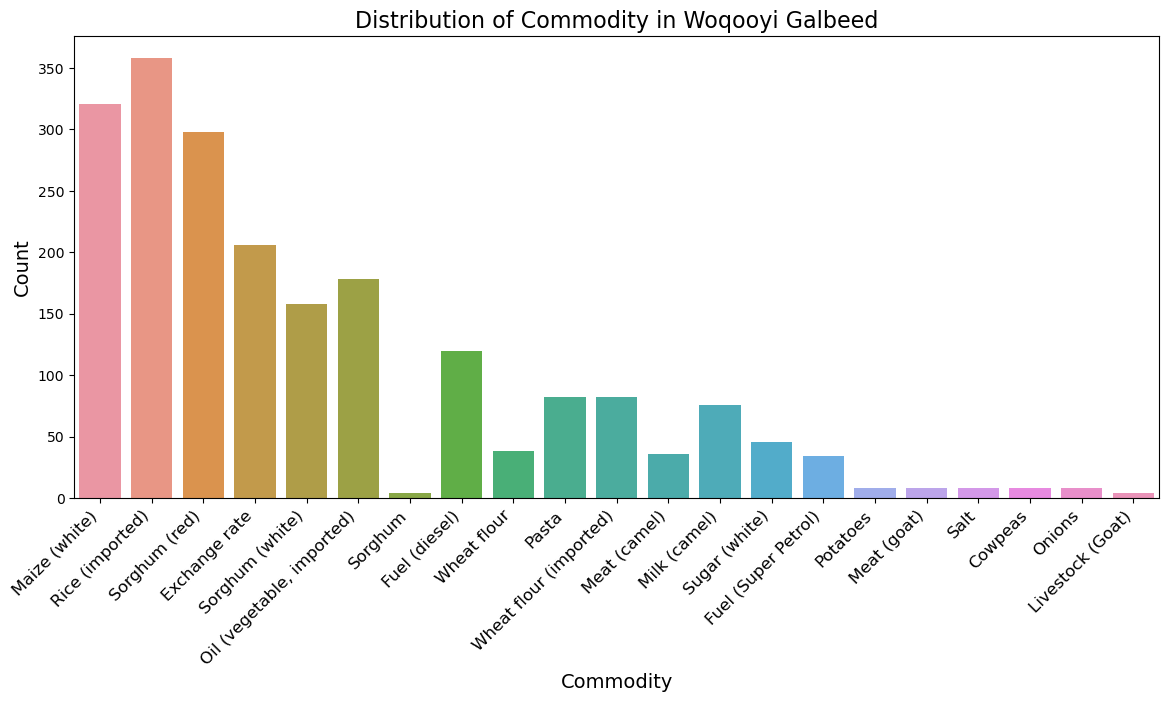

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset and converted 'date' to datetime
# Assuming you've added the 'month' column as mentioned in the previous code snippet

# Subset of the data for 'Hargeysa' region
hargeysa_data = data[data['Region'] == 'Woqooyi Galbeed']

# Check if there is data for 'Hargeysa'
if not hargeysa_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Hargeysa'
    sns.countplot(x='commodity', data=hargeysa_data)
    plt.title('Distribution of Commodity in Woqooyi Galbeed', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for Hargeysa.")


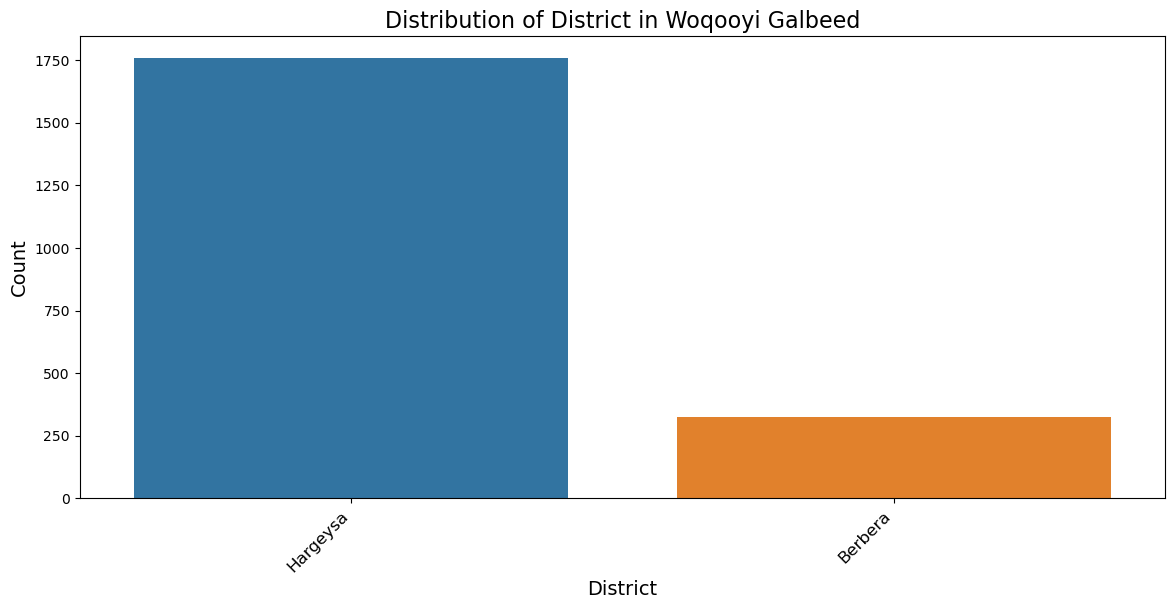

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Woqooyi Galbeed' region
woqooyi_galbeed_data = data[data['Region'] == 'Woqooyi Galbeed']

# Check if there is data for 'Woqooyi Galbeed'
if not woqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'District' distribution in 'Woqooyi Galbeed'
    sns.countplot(x='District', data=woqooyi_galbeed_data)
    plt.title('Distribution of District in Woqooyi Galbeed', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('District', fontsize=14)

    plt.show()
else:
    print("No data available for Woqooyi Galbeed.")


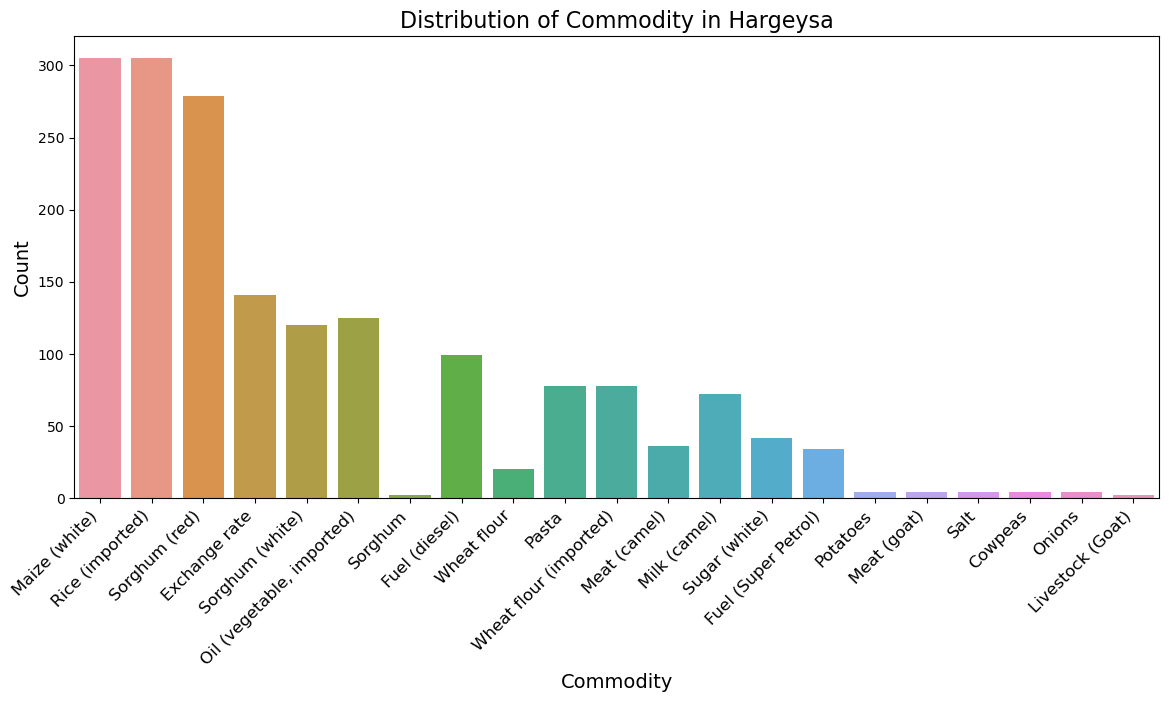

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Woqooyi Galbeed' region and 'Hargeysa' district
woqooyi_hargeysa_data = data[(data['Region'] == 'Woqooyi Galbeed') & (data['District'] == 'Hargeysa')]

# Check if there is data for the specified conditions
if not woqooyi_hargeysa_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Hargeysa' district (Woqooyi Galbeed region)
    sns.countplot(x='commodity', data=woqooyi_hargeysa_data)
    plt.title('Distribution of Commodity in Hargeysa', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Hargeysa (Woqooyi Galbeed region).")


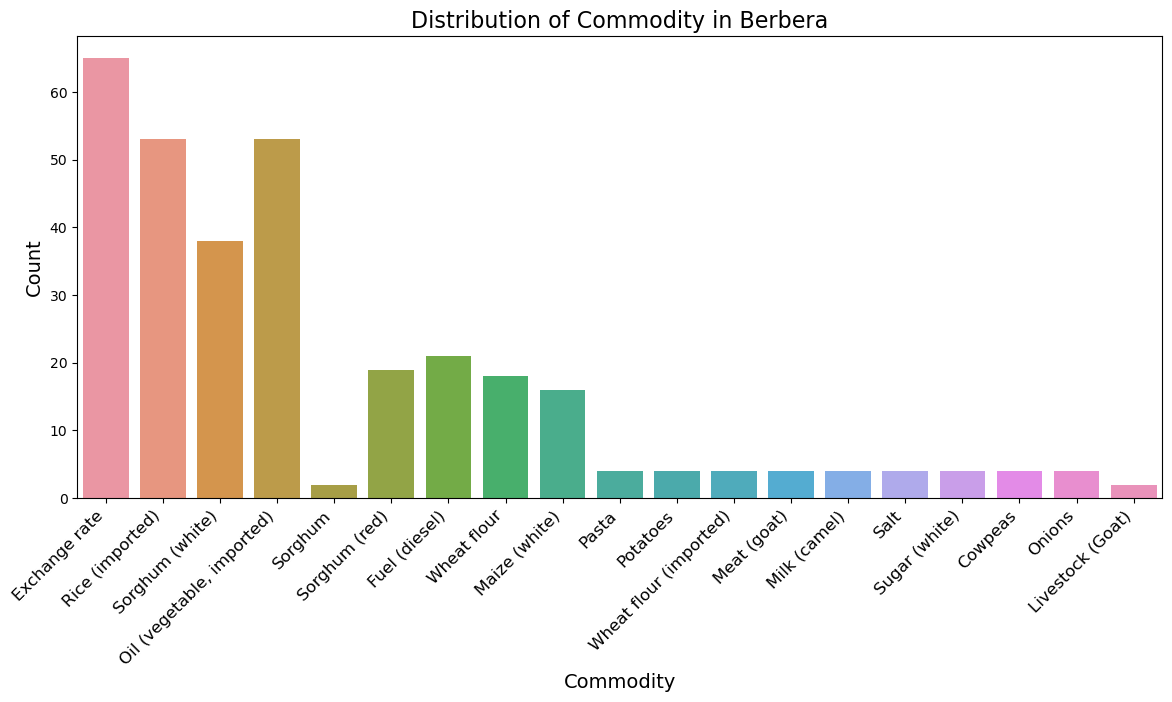

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Woqooyi Galbeed' region and 'Berbera' district
woqooyi_berbera_data = data[(data['Region'] == 'Woqooyi Galbeed') & (data['District'] == 'Berbera')]

# Check if there is data for the specified conditions
if not woqooyi_berbera_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Berbera' district (Woqooyi Galbeed region)
    sns.countplot(x='commodity', data=woqooyi_berbera_data)
    plt.title('Distribution of Commodity in Berbera', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Berbera (Woqooyi Galbeed region).")


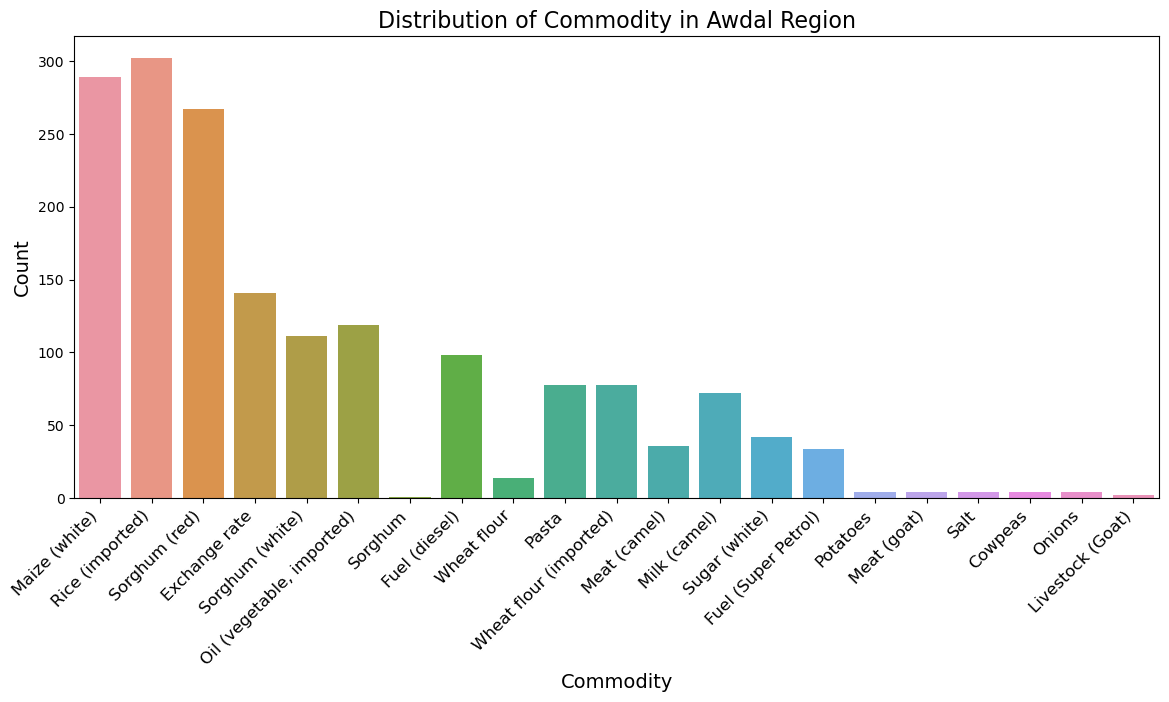

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Awdal' region
awdal_data = data[data['Region'] == 'Awdal']

# Check if there is data for the specified region
if not awdal_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Awdal' region
    sns.countplot(x='commodity', data=awdal_data)
    plt.title('Distribution of Commodity in Awdal Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Awdal region.")


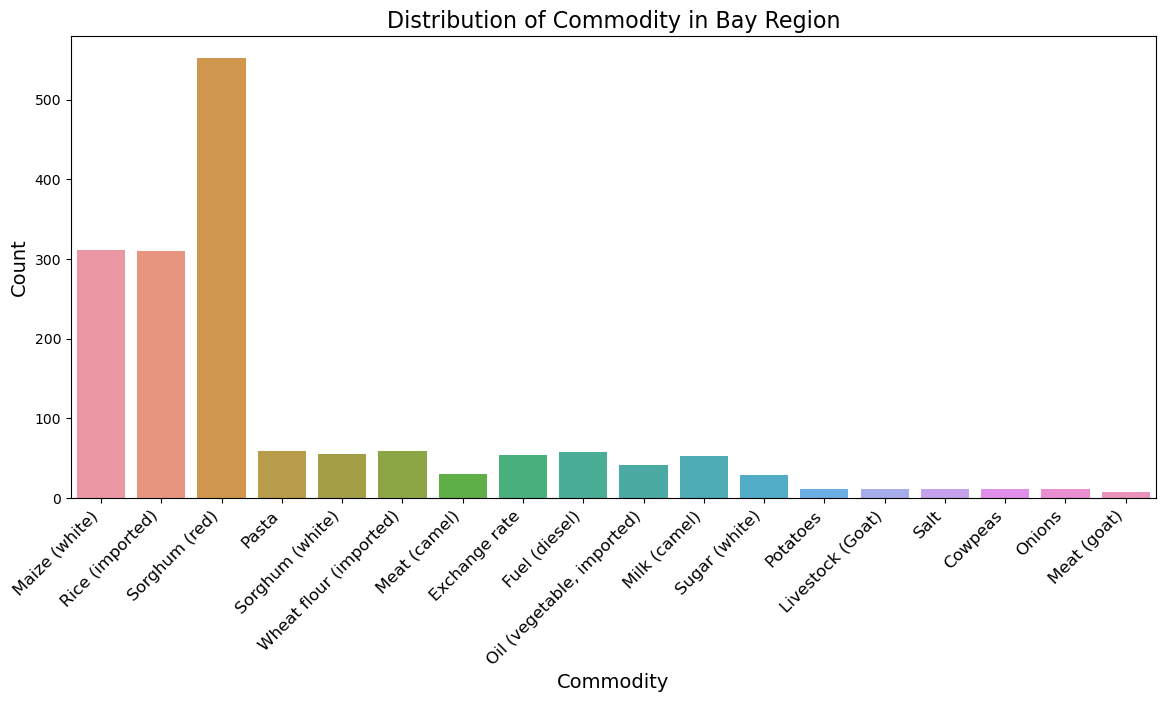

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region
bay_data = data[data['Region'] == 'Bay']

# Check if there is data for the specified region
if not bay_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Bay' region
    sns.countplot(x='commodity', data=bay_data)
    plt.title('Distribution of Commodity in Bay Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Bay region.")


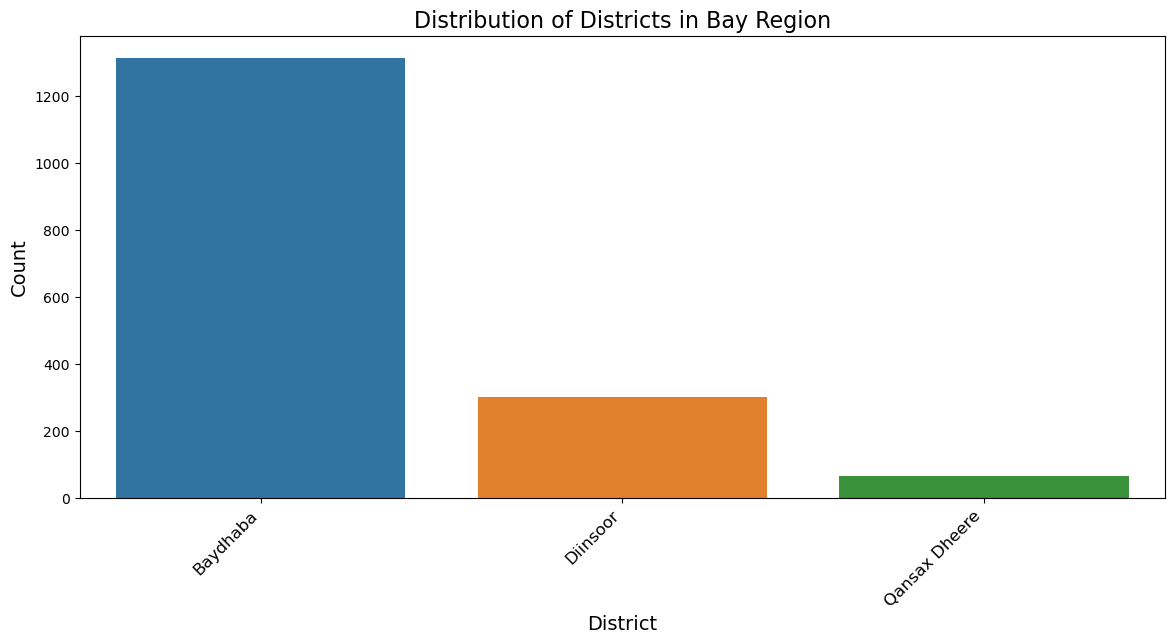

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region
bay_data = data[data['Region'] == 'Bay']

# Check if there is data for the specified region
if not bay_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'District' distribution in 'Bay' region
    sns.countplot(x='District', data=bay_data)
    plt.title('Distribution of Districts in Bay Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('District', fontsize=14)

    plt.show()
else:
    print("No data available for districts in Bay region.")


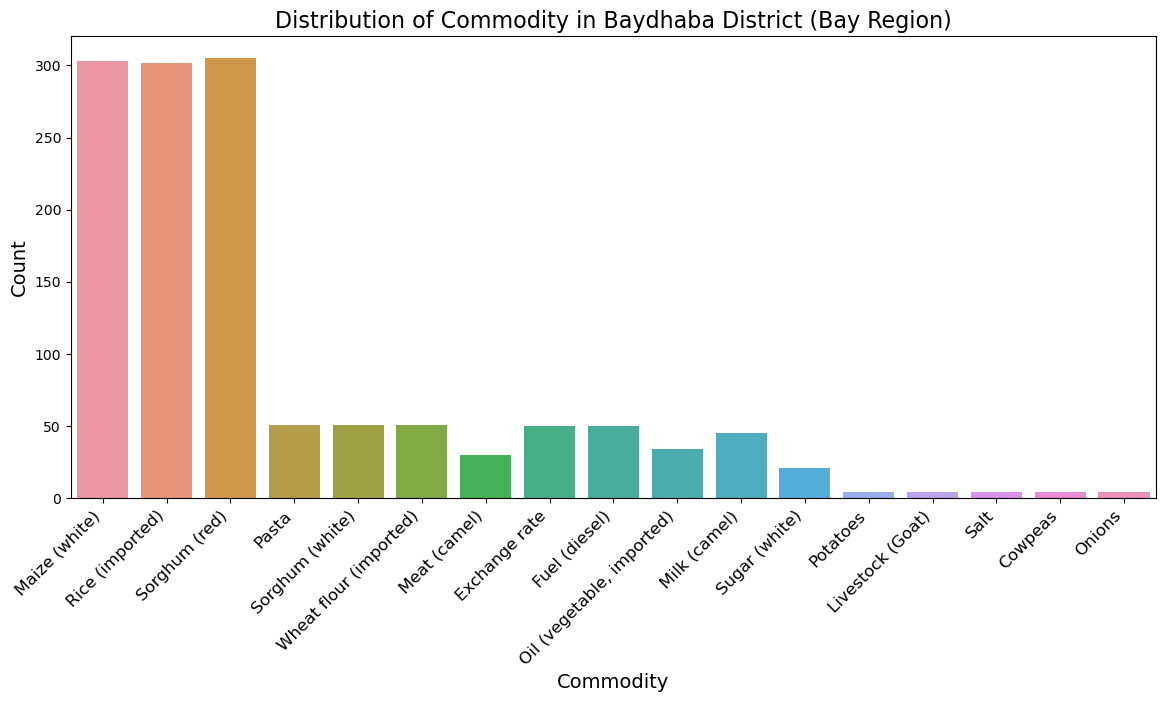

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region and 'Baydhaba' district
baydhaba_bay_data = data[(data['Region'] == 'Bay') & (data['District'] == 'Baydhaba')]

# Check if there is data for the specified conditions
if not baydhaba_bay_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Baydhaba' district (Bay region)
    sns.countplot(x='commodity', data=baydhaba_bay_data)
    plt.title('Distribution of Commodity in Baydhaba District (Bay Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Baydhaba district (Bay region).")


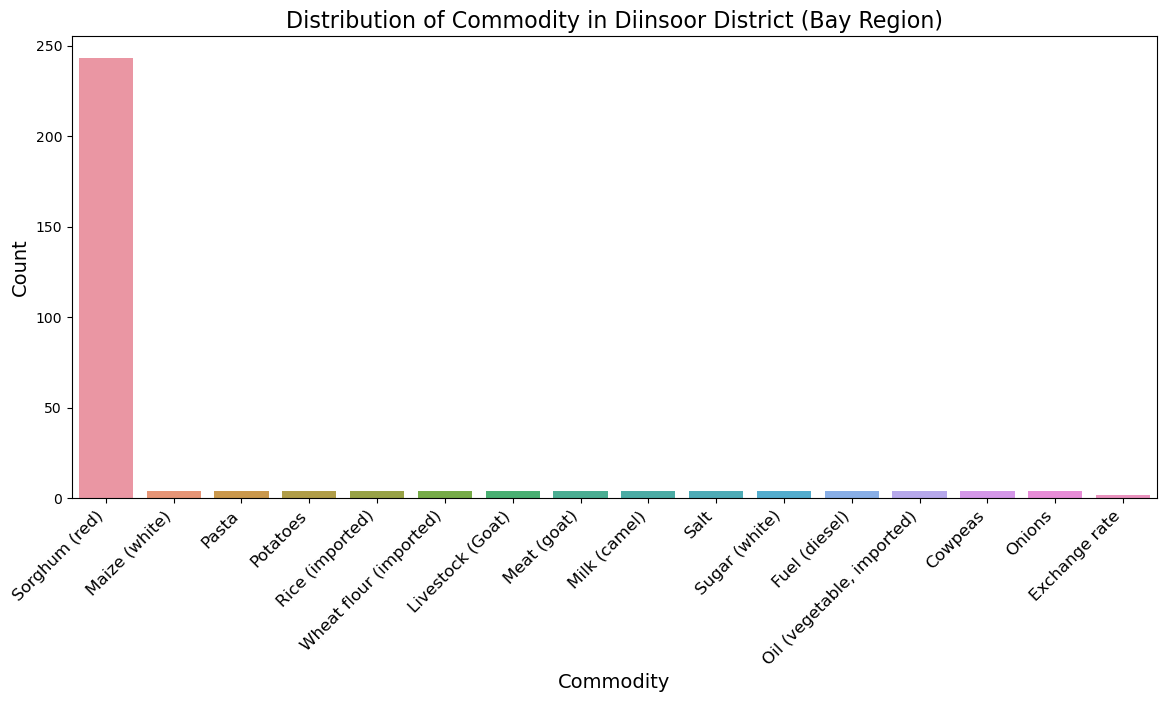

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region and 'Diinsoor' district
diinsoor_bay_data = data[(data['Region'] == 'Bay') & (data['District'] == 'Diinsoor')]

# Check if there is data for the specified conditions
if not diinsoor_bay_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Diinsoor' district (Bay region)
    sns.countplot(x='commodity', data=diinsoor_bay_data)
    plt.title('Distribution of Commodity in Diinsoor District (Bay Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Diinsoor district (Bay region).")


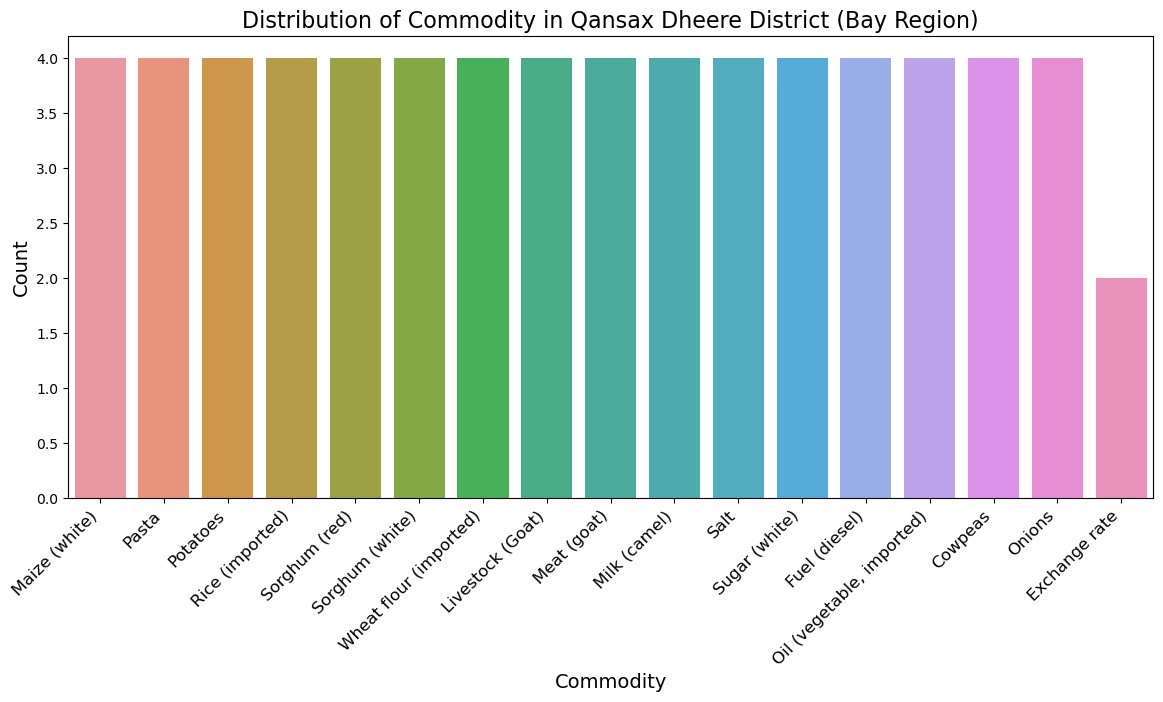

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region and 'Qansax Dheere' district
qansax_dheere_bay_data = data[(data['Region'] == 'Bay') & (data['District'] == 'Qansax Dheere')]

# Check if there is data for the specified conditions
if not qansax_dheere_bay_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Qansax Dheere' district (Bay region)
    sns.countplot(x='commodity', data=qansax_dheere_bay_data)
    plt.title('Distribution of Commodity in Qansax Dheere District (Bay Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Qansax Dheere district (Bay region).")


In [164]:
# Assuming you've already loaded your dataset

# Subset of the data for 'Bay' region and 'Qansax Dheere' district
qansax_dheere_bay_data = data[(data['Region'] == 'Bay') & (data['District'] == 'Qansax Dheere')]

# Check if there is data for the specified conditions
if not qansax_dheere_bay_data.empty:
    # Calculate total count and total unit for all commodities
    total_count = qansax_dheere_bay_data['commodity'].count()
    total_unit = qansax_dheere_bay_data['unit'].count()

    print(f"Total count of all commodities in Qansax Dheere, Bay region: {total_count}")
    print(f"Total unit of all commodities in Qansax Dheere, Bay region: {total_unit}")
else:
    print("No data available for commodities in Qansax Dheere district, Bay region.")


Total count of all commodities in Qansax Dheere, Bay region: 66
Total unit of all commodities in Qansax Dheere, Bay region: 66


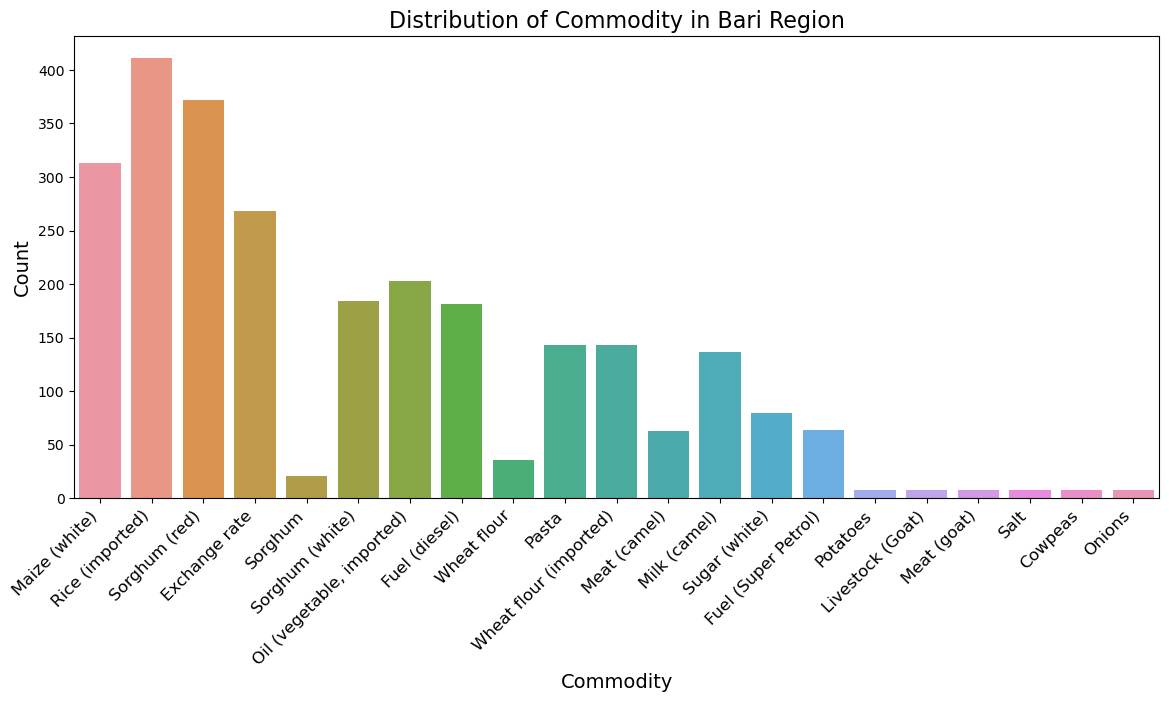

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bari' region
bari_data = data[data['Region'] == 'Bari']

# Check if there is data for the specified region
if not bari_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Bari' region
    sns.countplot(x='commodity', data=bari_data)
    plt.title('Distribution of Commodity in Bari Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Bari region.")


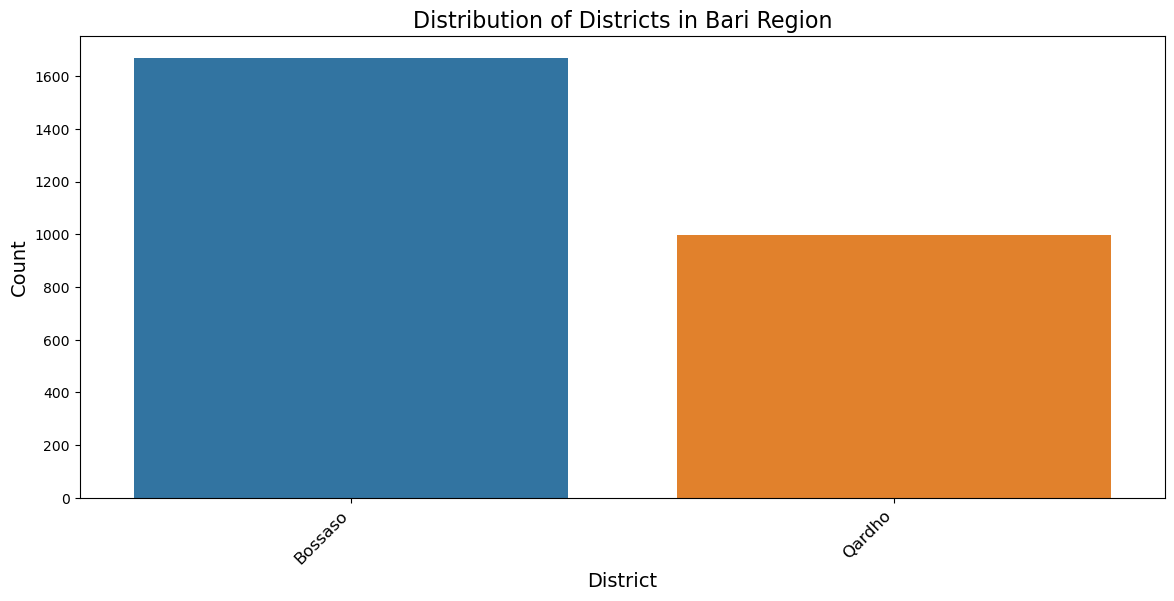

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bari' region
bari_data = data[data['Region'] == 'Bari']

# Check if there is data for the specified region
if not bari_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'District' distribution in 'Bari' region
    sns.countplot(x='District', data=bari_data)
    plt.title('Distribution of Districts in Bari Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('District', fontsize=14)

    plt.show()
else:
    print("No data available for districts in Bari region.")


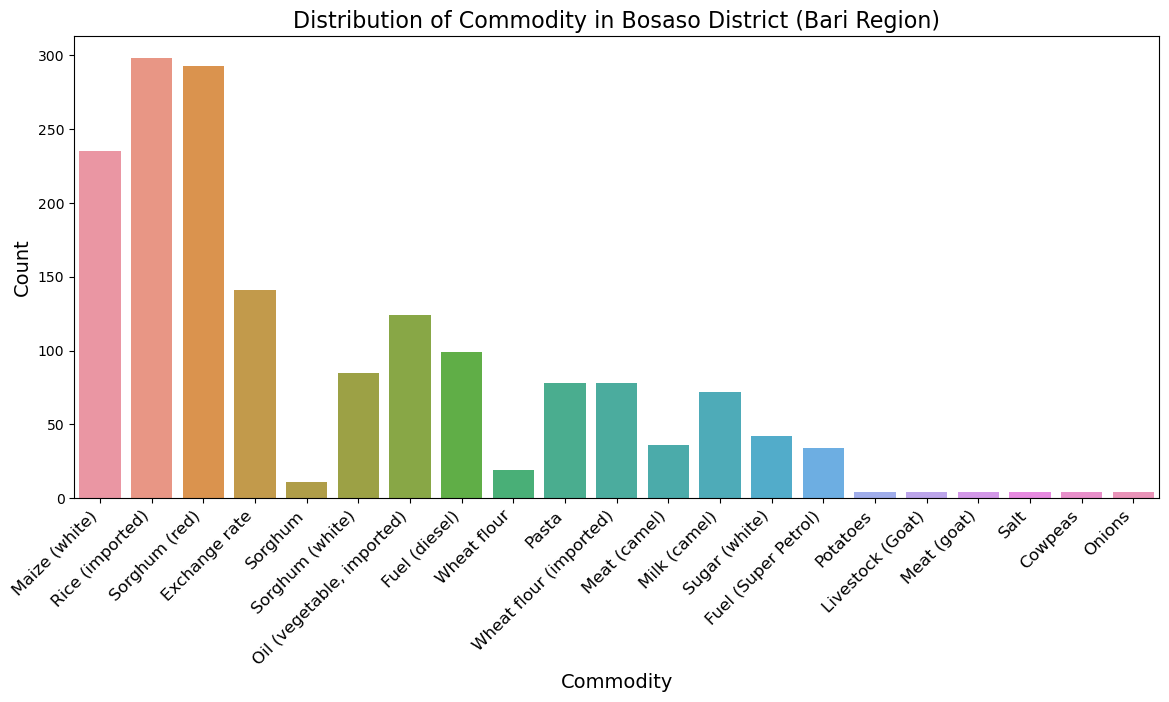

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bari' region and 'Bosaso' district
bosaso_bari_data = data[(data['Region'] == 'Bari') & (data['District'] == 'Bossaso')]

# Check if there is data for the specified conditions
if not bosaso_bari_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Bosaso' district (Bari region)
    sns.countplot(x='commodity', data=bosaso_bari_data)
    plt.title('Distribution of Commodity in Bosaso District (Bari Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Bosaso district (Bari region).")


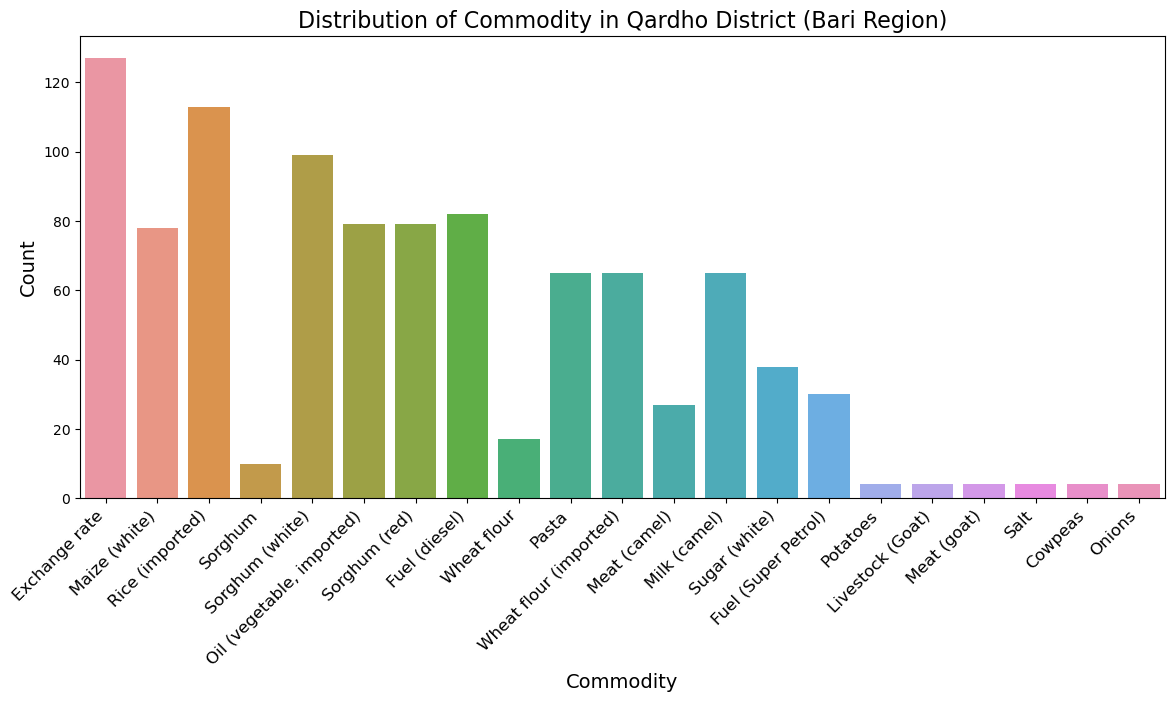

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Bari' region and 'Bosaso' district
bosaso_bari_data = data[(data['Region'] == 'Bari') & (data['District'] == 'Qardho')]

# Check if there is data for the specified conditions
if not bosaso_bari_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Bosaso' district (Bari region)
    sns.countplot(x='commodity', data=bosaso_bari_data)
    plt.title('Distribution of Commodity in Qardho District (Bari Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Bosaso district (Bari region).")


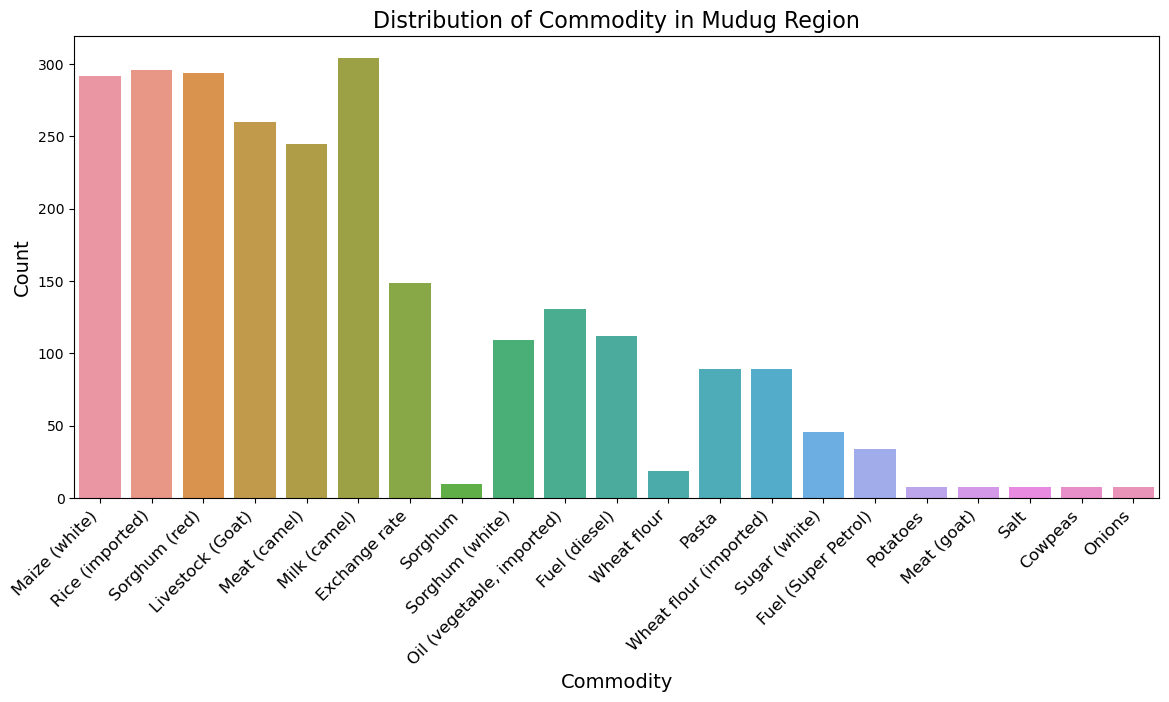

In [178]:
# Subset of the data for 'Mudug' region
mudug_data = data[data['Region'] == 'Mudug']

# Check if there is data for the specified region
if not mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Mudug' region
    sns.countplot(x='commodity', data=mudug_data)
    plt.title('Distribution of Commodity in Mudug Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Mudug region.")


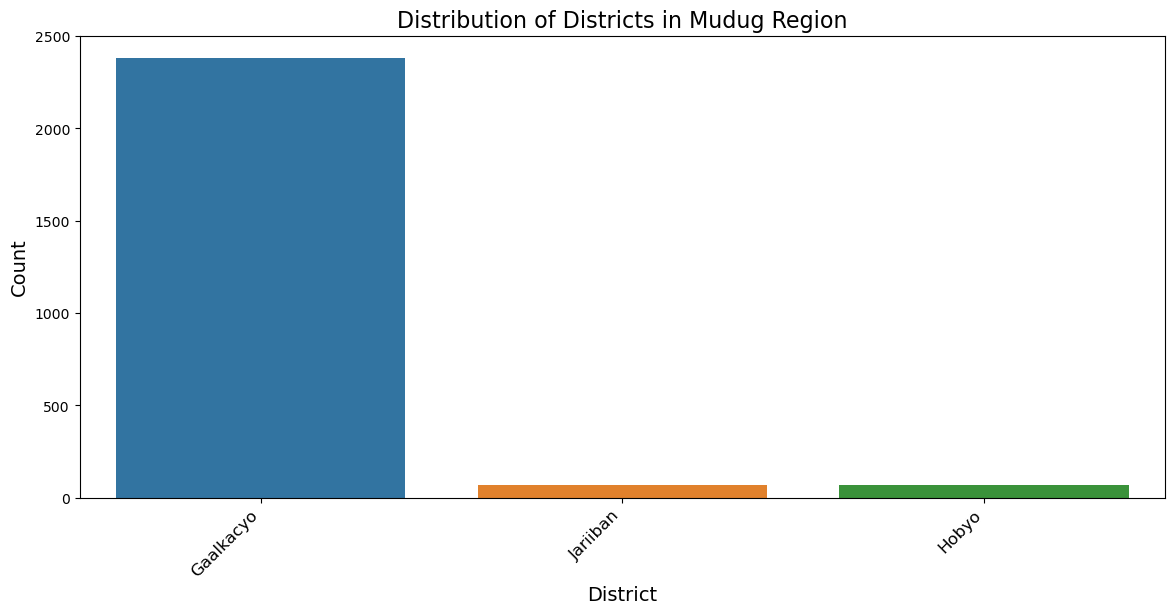

In [179]:
# Subset of the data for 'Mudug' region
mudug_data = data[data['Region'] == 'Mudug']

# Check if there is data for the specified region
if not mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'District' distribution in 'Mudug' region
    sns.countplot(x='District', data=mudug_data)
    plt.title('Distribution of Districts in Mudug Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('District', fontsize=14)

    plt.show()
else:
    print("No data available for districts in Mudug region.")


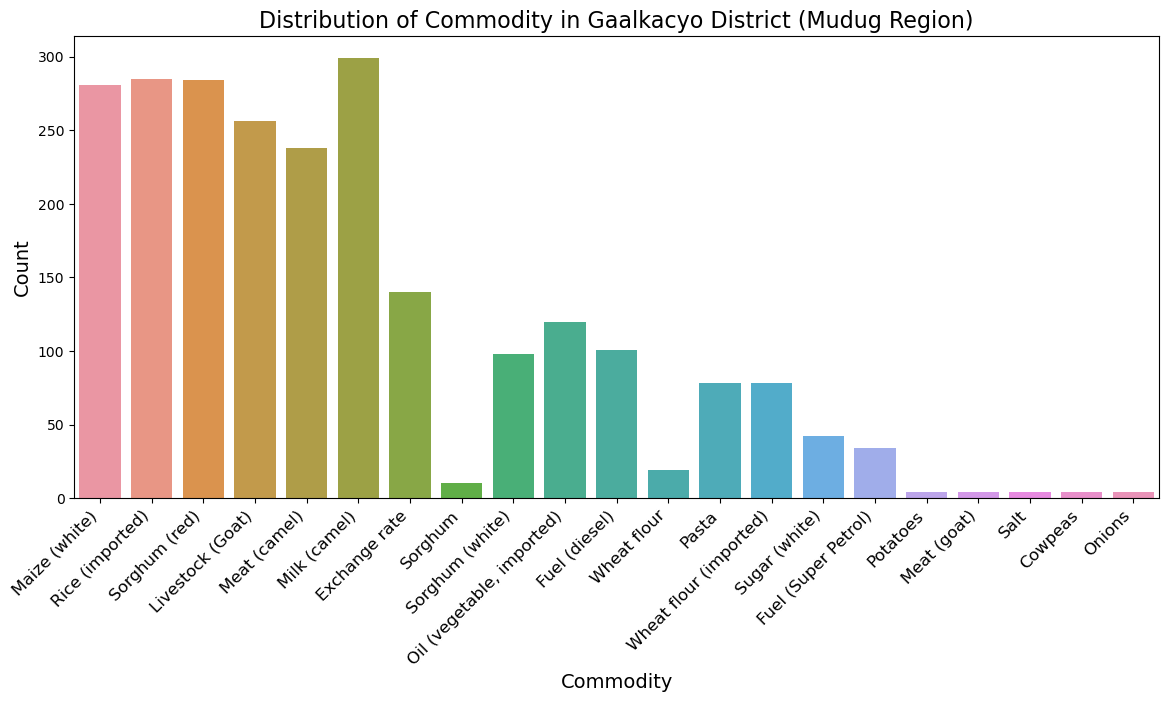

In [181]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Mudug') & (data['District'] == 'Gaalkacyo')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Gaalkacyo District (Mudug Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Gaalkacyo district (Mudug region).")


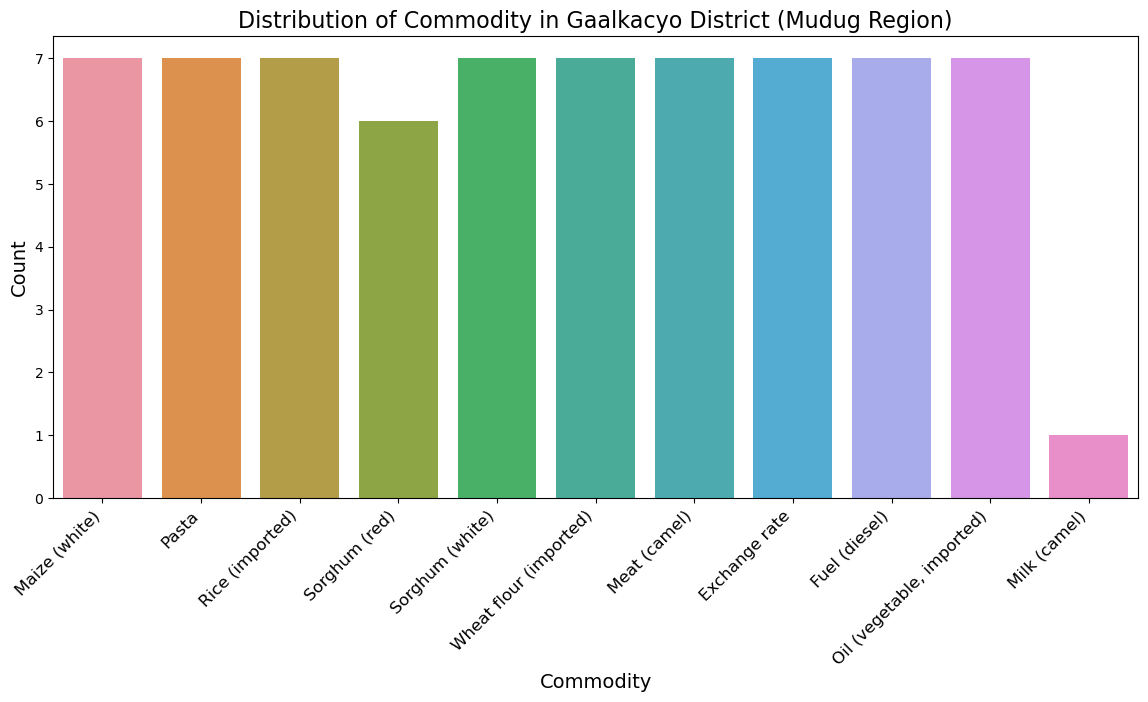

In [182]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Mudug') & (data['District'] == 'Jariiban')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Gaalkacyo District (Mudug Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Gaalkacyo district (Mudug region).")


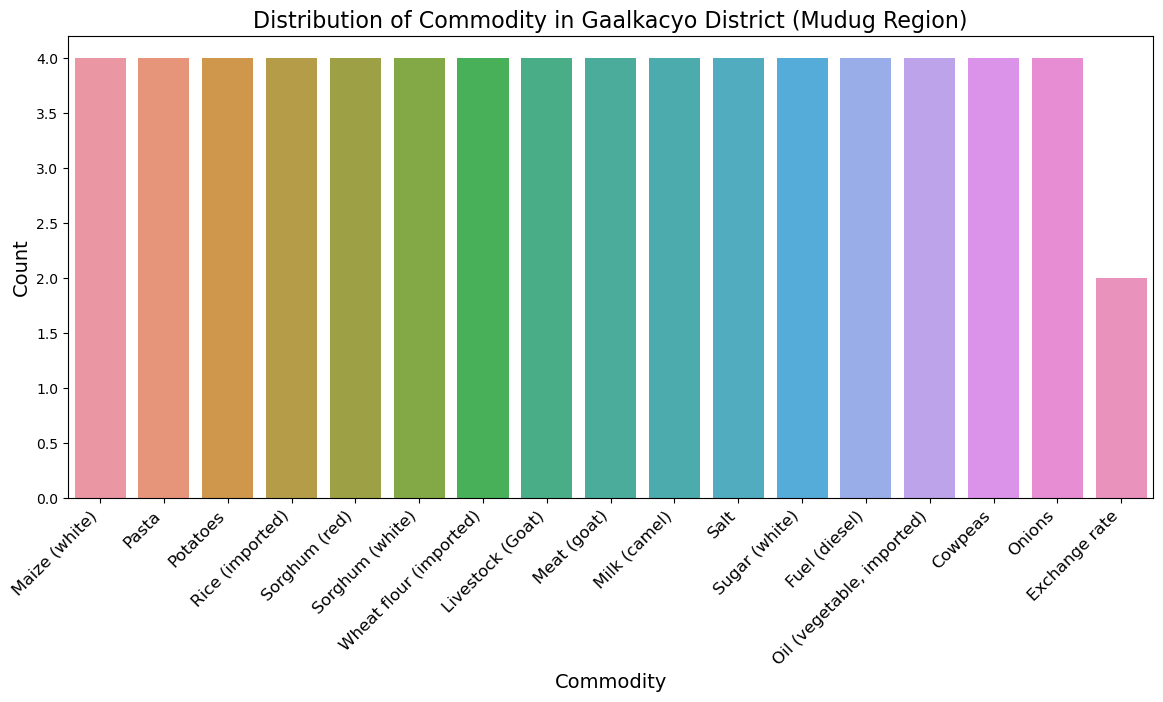

In [183]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Mudug') & (data['District'] == 'Hobyo')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Gaalkacyo District (Mudug Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Gaalkacyo district (Mudug region).")


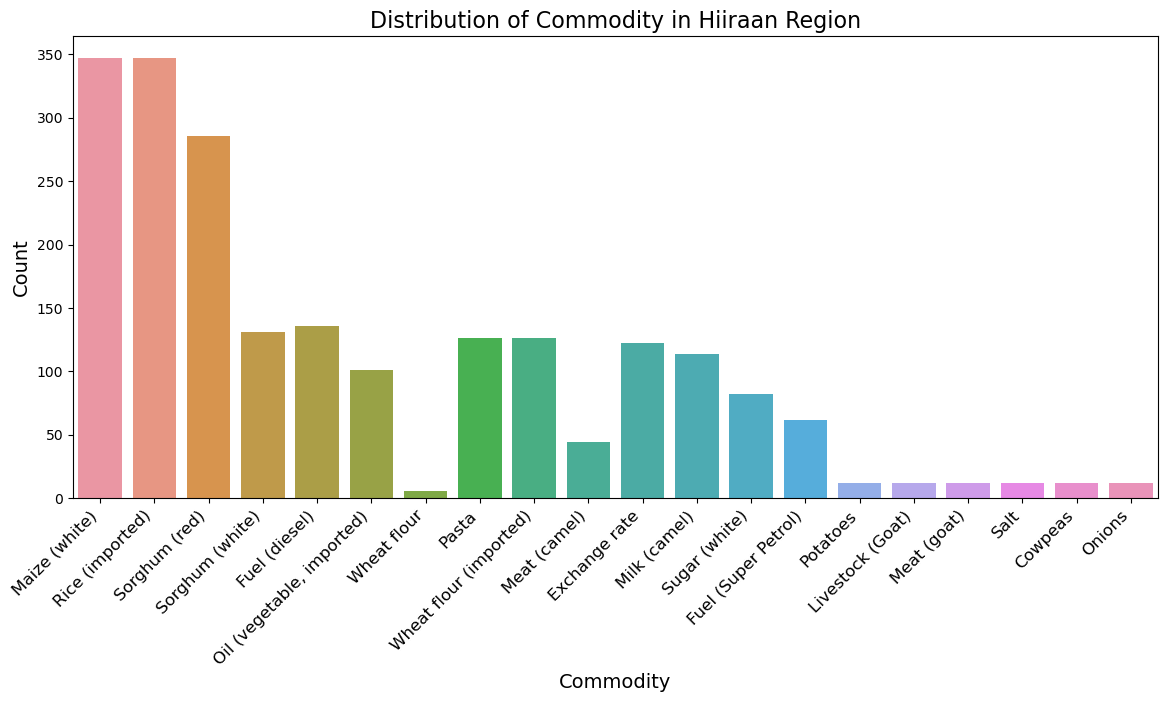

In [185]:
# Subset of the data for 'Mudug' region
mudug_data = data[data['Region'] == 'Hiraan']

# Check if there is data for the specified region
if not mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Mudug' region
    sns.countplot(x='commodity', data=mudug_data)
    plt.title('Distribution of Commodity in Hiiraan Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Hiiraan region.")


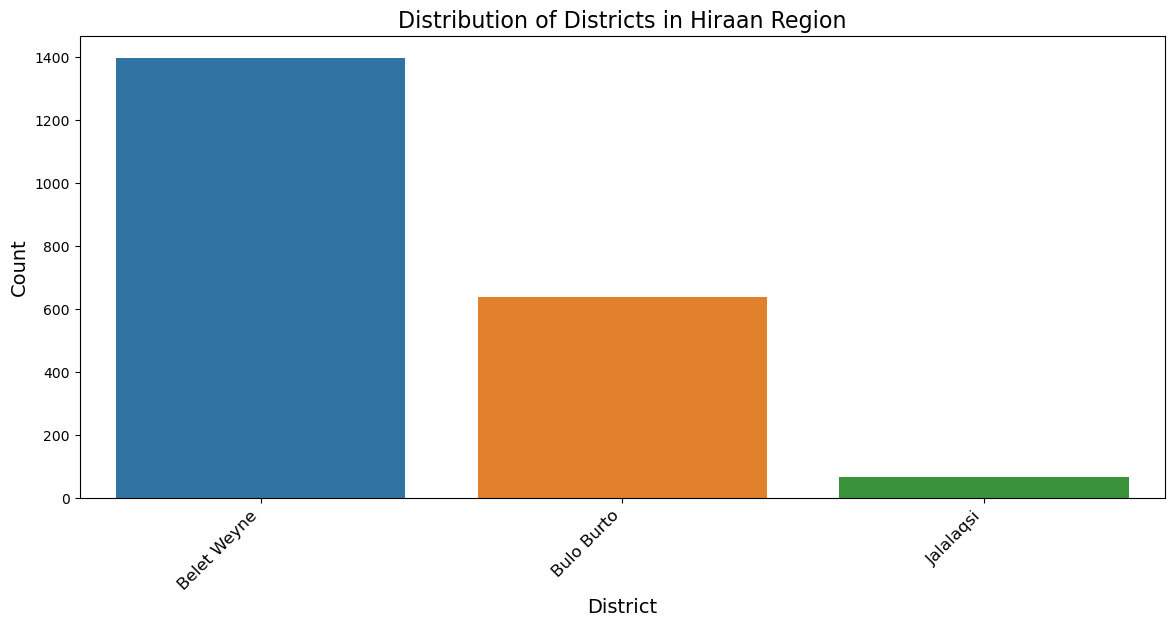

In [186]:
# Subset of the data for 'Mudug' region
mudug_data = data[data['Region'] == 'Hiraan']

# Check if there is data for the specified region
if not mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'District' distribution in 'Mudug' region
    sns.countplot(x='District', data=mudug_data)
    plt.title('Distribution of Districts in Hiraan Region', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('District', fontsize=14)

    plt.show()
else:
    print("No data available for districts in Hiiraan region.")


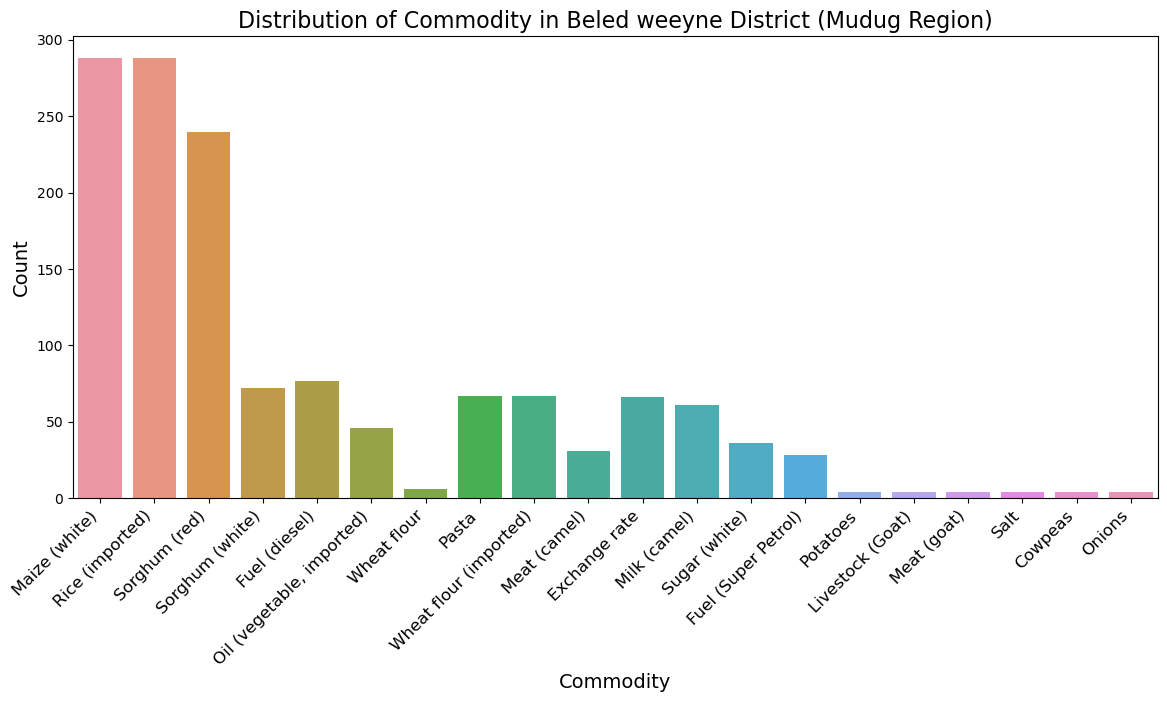

In [191]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Hiraan') & (data['District'] == 'Belet Weyne')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Beled weeyne District (Mudug Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Beledweeyne district (Mudug region).")


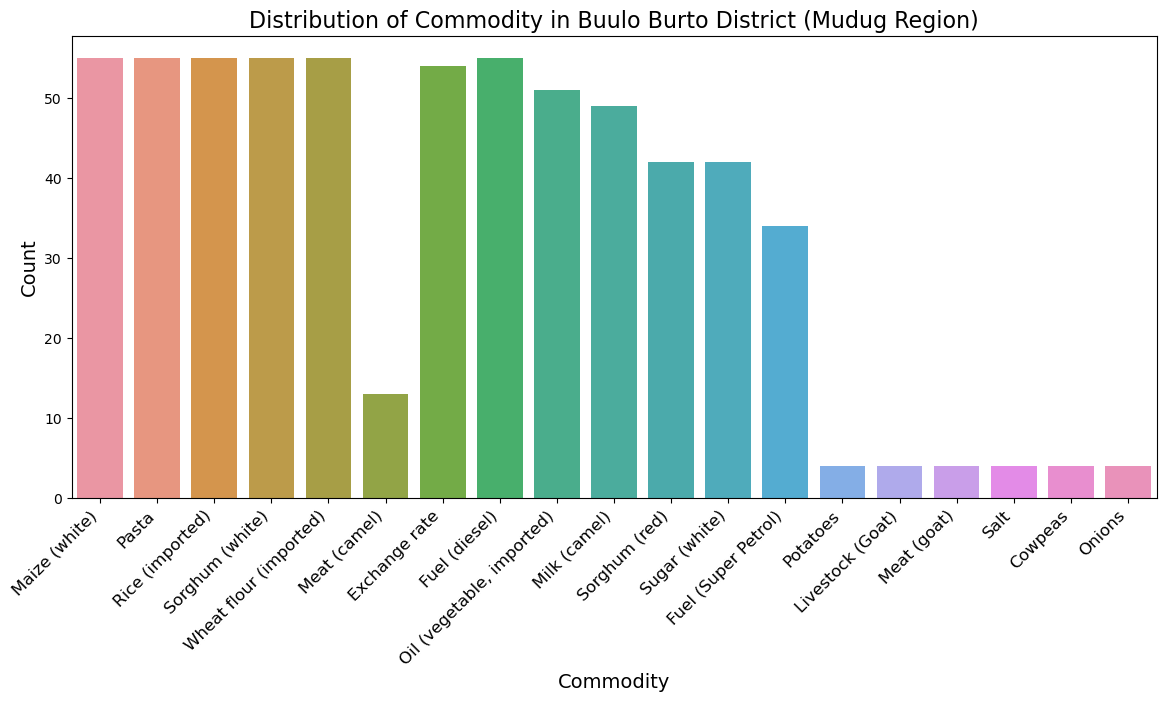

In [190]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Hiraan') & (data['District'] == 'Bulo Burto')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Buulo Burto District (Mudug Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in Buulo Burto district (Mudug region).")


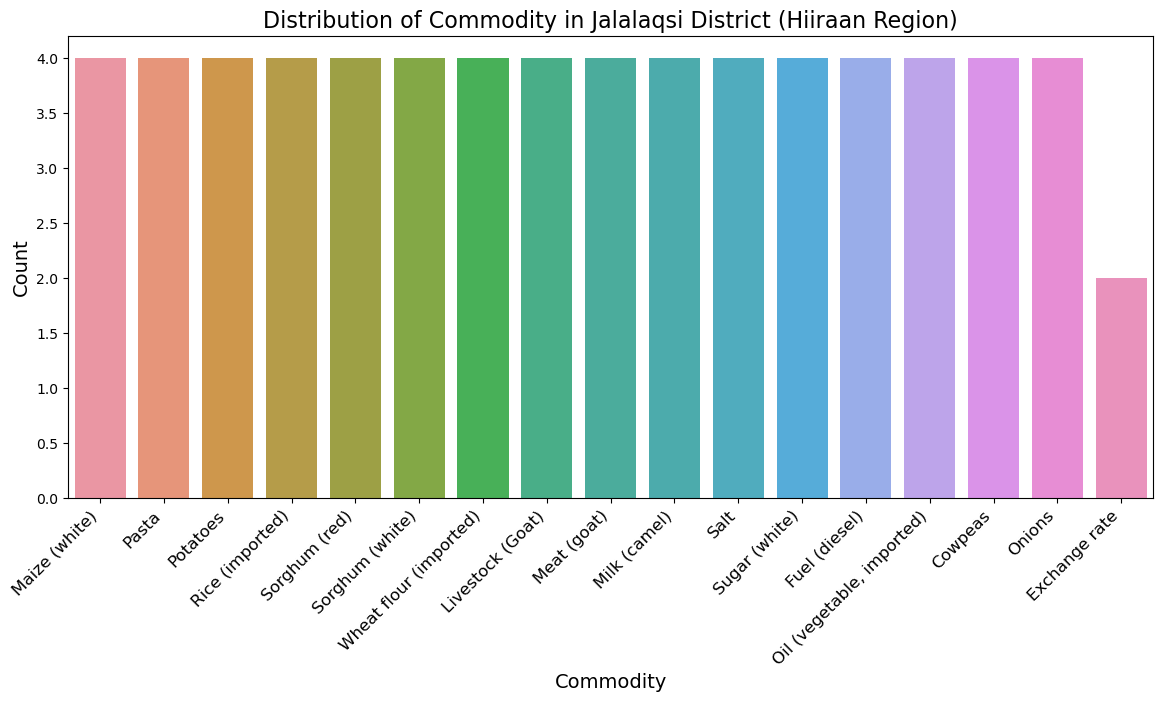

In [192]:
# Subset of the data for 'Mudug' region and 'Gaalkacyo' district
gaalkacyo_mudug_data = data[(data['Region'] == 'Hiraan') & (data['District'] == 'Jalalaqsi')]

# Check if there is data for the specified conditions
if not gaalkacyo_mudug_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # Bar plot for 'Commodity' distribution in 'Gaalkacyo' district (Mudug region)
    sns.countplot(x='commodity', data=gaalkacyo_mudug_data)
    plt.title('Distribution of Commodity in Jalalaqsi District (Hiiraan Region)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Commodity', fontsize=14)

    plt.show()
else:
    print("No data available for commodities in jalalaqsi district (Hiiraan region).")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2229152832.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2229152832.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


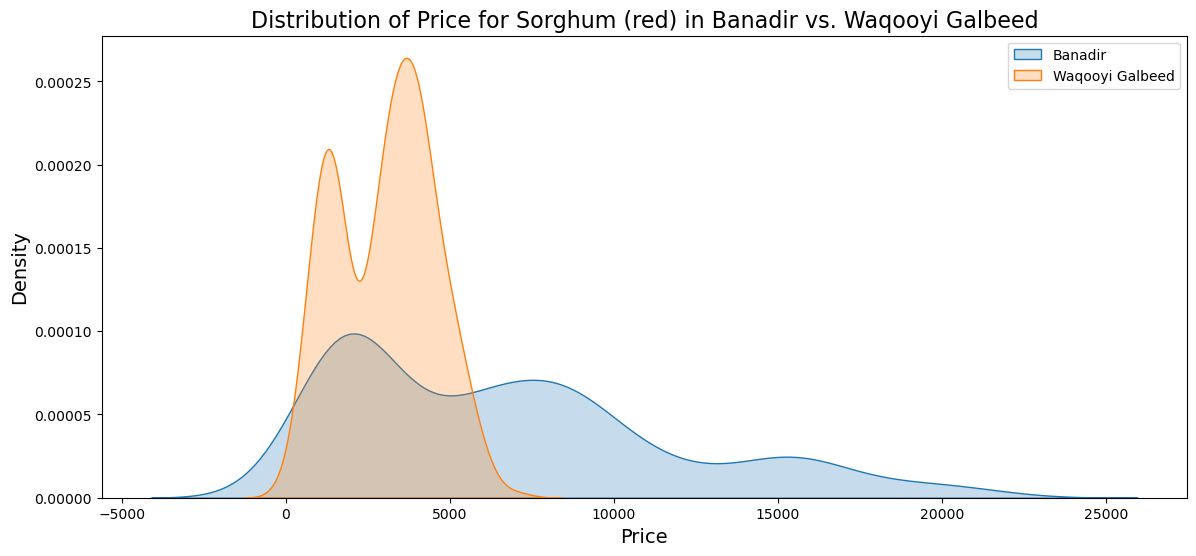

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed'
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir')]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed')]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title('Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print("No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\1073357939.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\1073357939.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


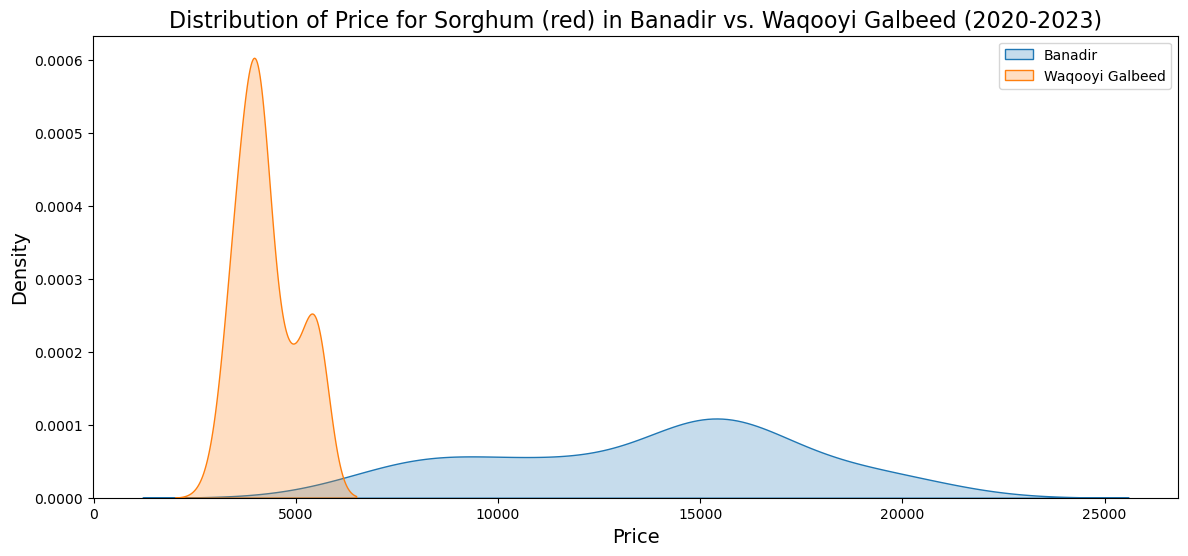

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2020
end_year = 2023

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\428760779.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\428760779.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


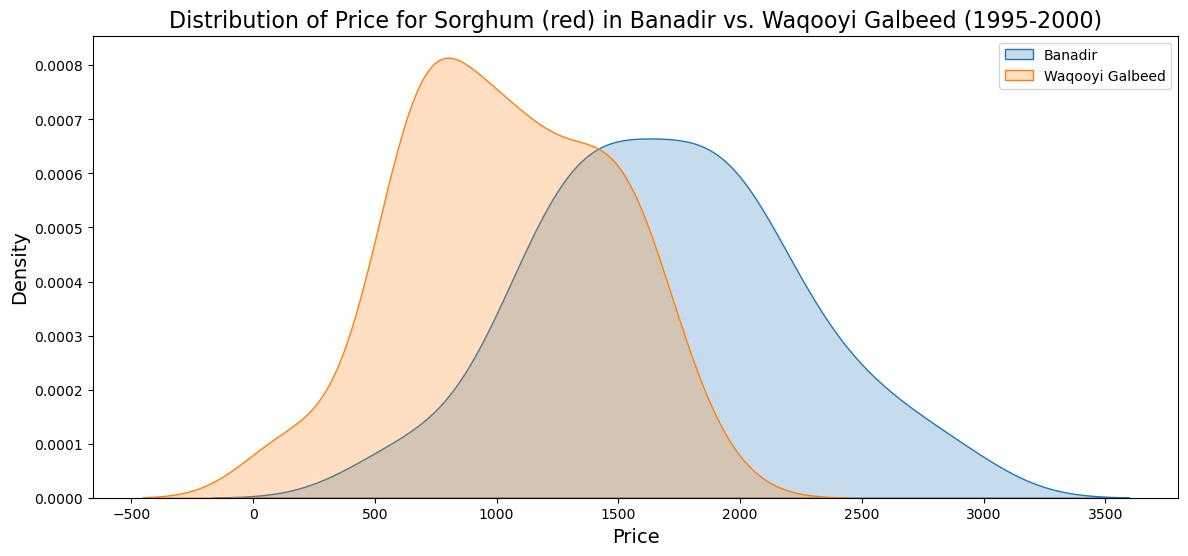

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 1995
end_year = 2000

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\3082180160.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\3082180160.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


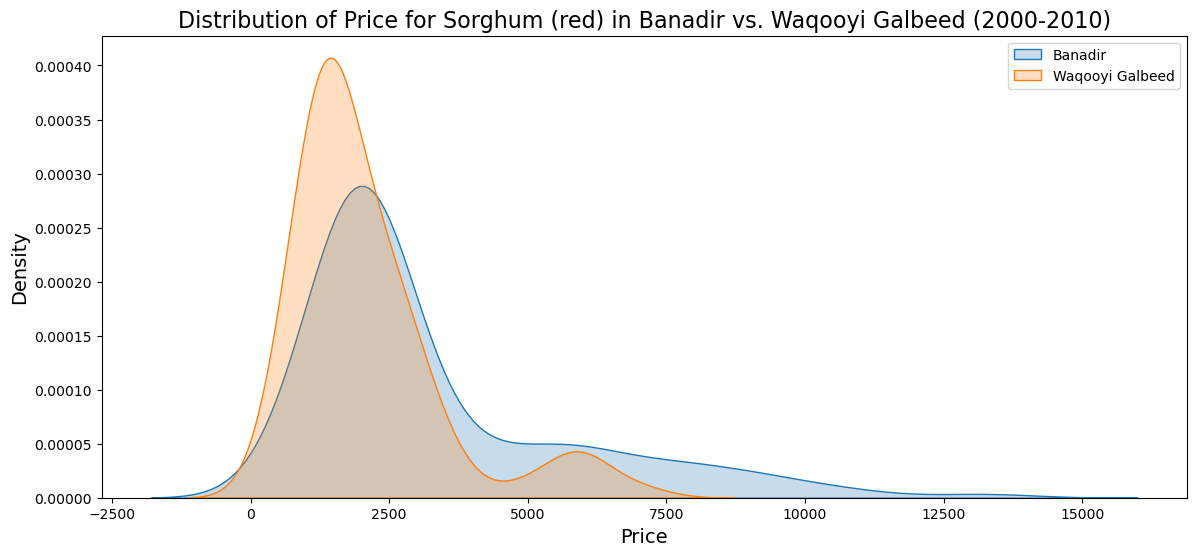

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2000
end_year = 2010

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\388456125.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\388456125.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


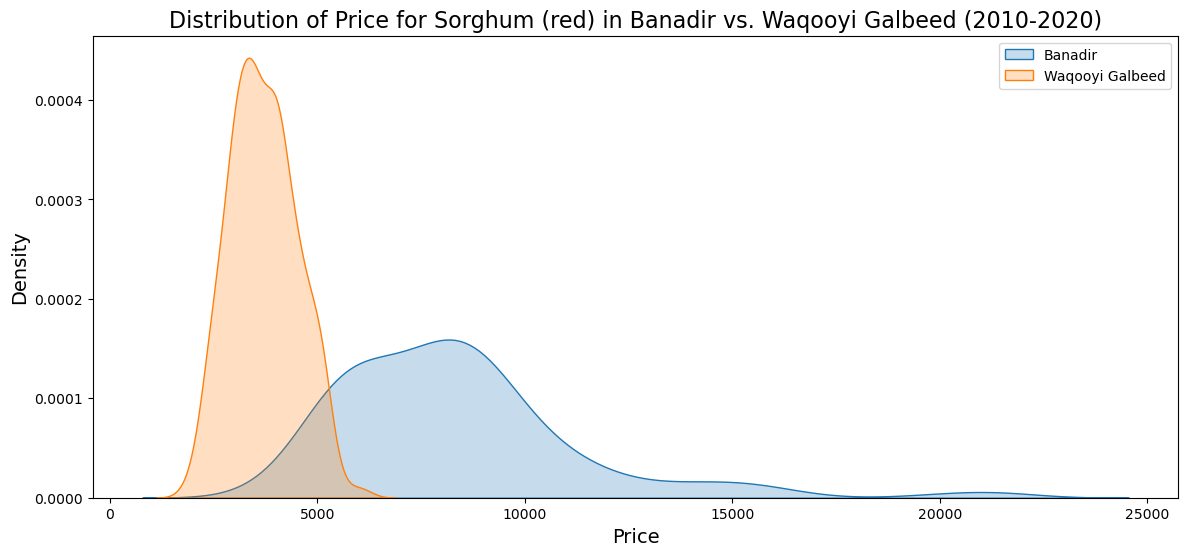

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2010
end_year = 2020

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2419906359.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rice_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\2419906359.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rice_waqooyi_galbeed_data['Price'], label='Hiraan', shade=True)


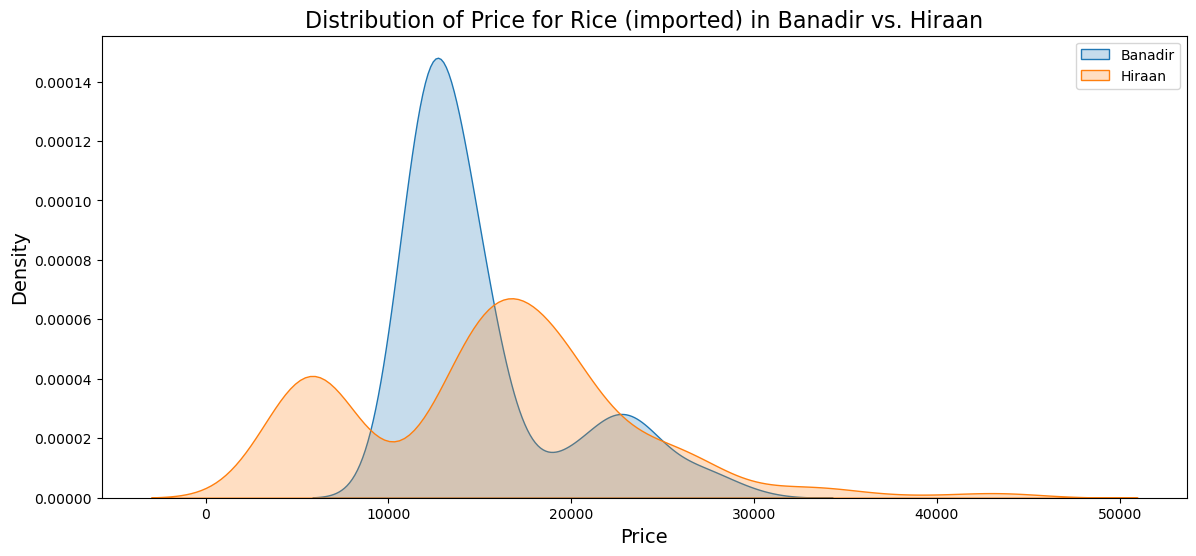

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Subset of the data for 'Rice (imported)' in 'Banadir' and 'Waqooyi Galbeed'
rice_banadir_data = data[(data['commodity'] == 'Rice (imported)') & (data['Region'] == 'Banadir')]
rice_waqooyi_galbeed_data = data[(data['commodity'] == 'Rice (imported)') & (data['Region'] == 'Hiraan')]

# Check if there is data for the specified conditions
if not rice_banadir_data.empty and not rice_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Rice (imported)' in 'Banadir'
    sns.kdeplot(rice_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Rice (imported)' in 'Waqooyi Galbeed'
    sns.kdeplot(rice_waqooyi_galbeed_data['Price'], label='Hiraan', shade=True)

    plt.title('Distribution of Price for Rice (imported) in Banadir vs. Hiraan', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print("No data available for Rice (imported) in either Banadir or Hiiraan.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\388456125.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\388456125.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)


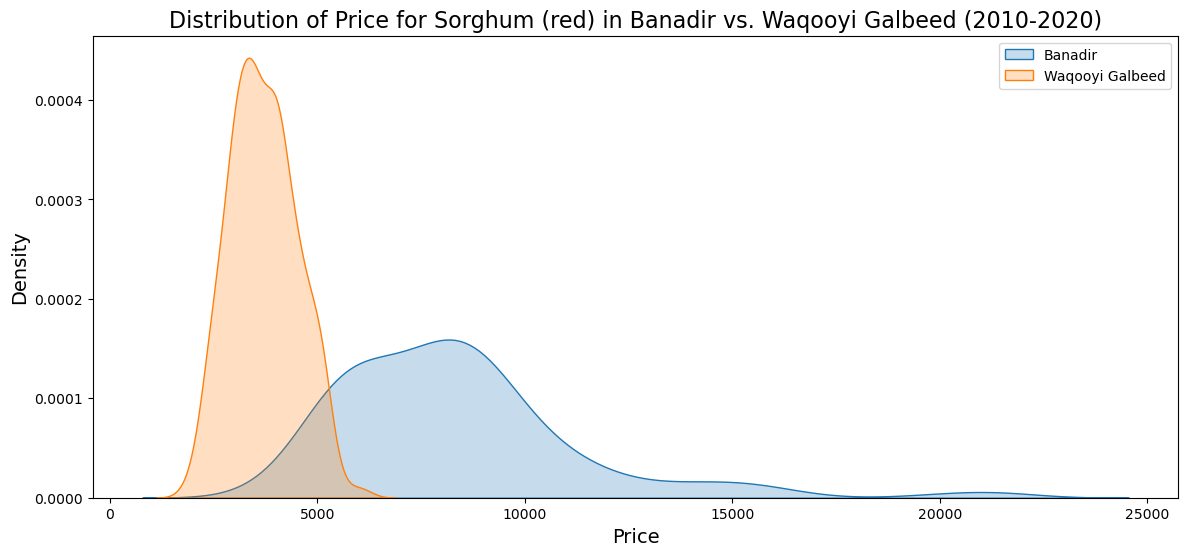

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2010
end_year = 2020

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Woqooyi Galbeed') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Waqooyi Galbeed', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Waqooyi Galbeed ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")


C:\Users\PC\AppData\Local\Temp\ipykernel_7052\1083237960.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7052\1083237960.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Hiraan', shade=True)


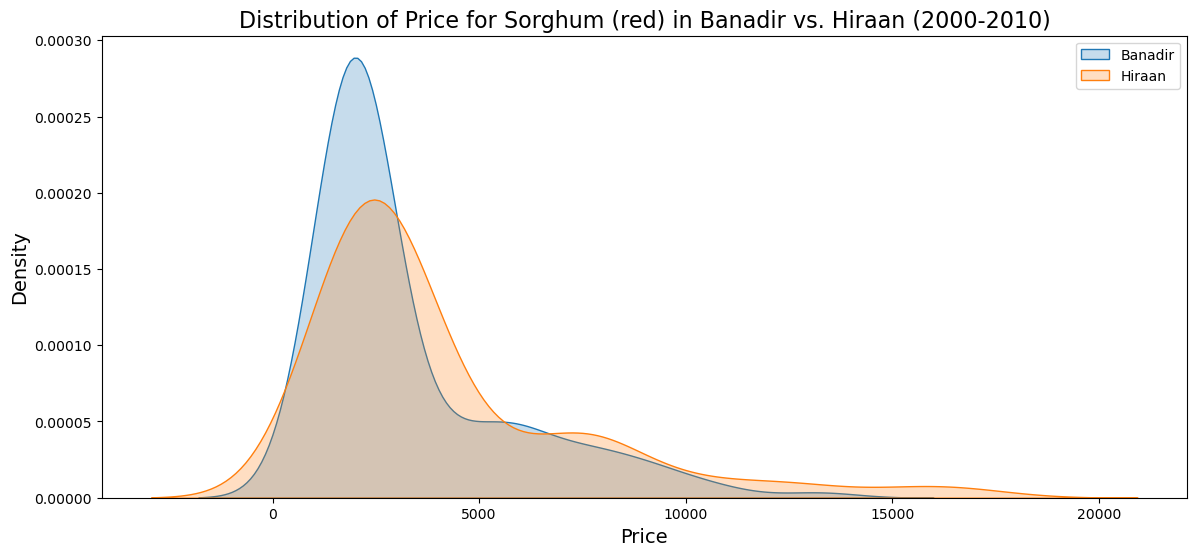

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year from the 'date' column
data['year'] = data['date'].dt.year

# Specify the desired years
start_year = 2000
end_year = 2010

# Subset of the data for 'Sorghum (red)' in 'Banadir' and 'Waqooyi Galbeed' between the specified years
sorghum_banadir_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Banadir') & (data['year'].between(start_year, end_year))]
sorghum_waqooyi_galbeed_data = data[(data['commodity'] == 'Sorghum (red)') & (data['Region'] == 'Hiraan') & (data['year'].between(start_year, end_year))]

# Check if there is data for the specified conditions
if not sorghum_banadir_data.empty and not sorghum_waqooyi_galbeed_data.empty:
    # Set a larger figure size for better visibility
    plt.figure(figsize=(14, 6))

    # KDE plot for price distribution of 'Sorghum (red)' in 'Banadir'
    sns.kdeplot(sorghum_banadir_data['Price'], label='Banadir', shade=True)

    # KDE plot for price distribution of 'Sorghum (red)' in 'Waqooyi Galbeed'
    sns.kdeplot(sorghum_waqooyi_galbeed_data['Price'], label='Hiraan', shade=True)

    plt.title(f'Distribution of Price for Sorghum (red) in Banadir vs. Hiraan ({start_year}-{end_year})', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()

    plt.show()
else:
    print(f"No data available for Sorghum (red) in either Banadir or Waqooyi Galbeed between {start_year} and {end_year}.")
